In [1]:
from scipy.stats import chisquare
from scipy import stats
import urllib.request
import string
import requests
from bs4 import BeautifulSoup
import pandas as pd
import multiprocessing
import gensim
import sys
import seaborn as sns
from nltk.tokenize import WordPunctTokenizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from scipy import spatial
from collections import Counter
import numpy as np
from collections import defaultdict
from pprint import pprint
from gensim import corpora
import re
import logging
import requests
import urllib 
import re
import sys
import zipfile
from glob import glob
import statsmodels.api as sm
import scipy
import scipy.stats as ss
from scipy.signal import savgol_filter
import random
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import metrics
from sklearn.cluster import KMeans
# from the demo
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

from brokenaxes import brokenaxes

In [2]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()
    
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def cultureD2(model, words):
    cultures = []
    for word in words:
        if (word[0] in model.wv.vocab) & (word[1] in model.wv.vocab):
            cultures.append(normalize(normalize(model[word[0]]) - normalize(model[word[1]])))
        else:
            print(word)
    culturev = normalize(np.mean(cultures, axis=0))
    return culturev

def storyv(model,words):
    veclist=[]
    for w in words:
        if w in model.wv.vocab:
            veclist.append(normalize(model[w]))
    storyv=normalize(np.mean(veclist,axis=0))
    return storyv

def projection(storyv, culturev):
    # cosine similarity
    return (1 - spatial.distance.cosine(storyv, culturev))
           
def cosine2angle(i):
    return np.arccos(i) / np.pi * 180 #长度换角度

def normalized(x):
    x= np.array(x)
    return (x-np.mean(x))/np.std(x)

In [3]:
words=pd.read_csv('./words.csv')
word=words['word'].values
word_re=list(reversed(word))

In [4]:
a=list(zip(word,word_re))

In [5]:
len(a)

10222

In [6]:
# swords=a[:2000]
# swords=a[:20]

In [6]:
swords = [
    ['success','failure'],
    ['succeed','fail'],
    ['lucky', 'unlucky'],
    ['fortunate', 'unfortunate'],
    ['happy', 'unhappy'],
    ['glad', 'sad'],
    ['joy', 'sorrow'],
    ['smile', 'tear']
] # success words

In [7]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

# model = gensim.models.KeyedVectors.load_word2vec_format('english_fiction_sgns_gensim_1990.txt')

2019-05-30 10:48:31,088 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin
2019-05-30 10:49:13,390 : INFO : loaded (3000000, 300) matrix from GoogleNews-vectors-negative300.bin


In [10]:
# import gensim
# import os
# import shutil
# import hashlib
# from sys import platform

# def getFileLineNums(filename):
#     f = open(filename, 'r')
#     count = 0
#     for line in f:
#         count += 1
#     return count


# def prepend_line(infile, outfile, line):
#     with open(infile, 'r') as old:
#         with open(outfile, 'w') as new:
#             new.write(str(line) + "\n")
#             shutil.copyfileobj(old, new)

# def prepend_slow(infile, outfile, line):
#     with open(infile, 'r') as fin:
#         with open(outfile, 'w') as fout:
#             fout.write(line + "\n")
#             for line in fin:
#                 fout.write(line)

# def load(filename):
#     num_lines = getFileLineNums(filename)
#     gensim_file = 'twitter_200_new.txt'
#     gensim_first_line = "{} {}".format(num_lines, 200)
#     # Prepends the line.
#     if platform == "linux" or platform == "linux2":
#         prepend_line(filename, gensim_file, gensim_first_line)
#     else:
#         prepend_slow(filename, gensim_file, gensim_first_line)

#     model = gensim.models.KeyedVectors.load_word2vec_format(gensim_file,binary=False)
#     return model

In [11]:
model1 = gensim.models.KeyedVectors.load_word2vec_format('twitter_200_new.txt',binary=False)

2019-05-27 22:46:46,297 : INFO : loading projection weights from twitter_200_new.txt
2019-05-27 22:50:25,814 : INFO : loaded (1193514, 200) matrix from twitter_200_new.txt


In [12]:
model2 = gensim.models.KeyedVectors.load_word2vec_format('glove_300_new.txt',binary=False)

2019-05-27 22:52:42,288 : INFO : loading projection weights from glove_300_new.txt
2019-05-27 22:54:23,859 : INFO : loaded (400000, 300) matrix from glove_300_new.txt


In [8]:
success_vector = cultureD2(model, swords)
success_word = [i[0] for i in model.similar_by_vector(success_vector, 1)]

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app
2019-05-30 10:49:23,587 : INFO : precomputing L2-norms of word weight vectors


In [14]:
success_word

['excited']

In [16]:
success_vector1 = cultureD2(model1, swords)
success_word1 = [i[0] for i in model1.similar_by_vector(success_vector1, 1)]

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app
2019-05-27 22:55:03,506 : INFO : precomputing L2-norms of word weight vectors


In [17]:
success_word1

['happy']

In [18]:
success_vector2 = cultureD2(model2, swords)
success_word2 = [i[0] for i in model2.similar_by_vector(success_vector2, 1)]

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app
2019-05-27 22:55:11,236 : INFO : precomputing L2-norms of word weight vectors


In [19]:
success_word2

['enjoying']

### emotional arc

#### model

In [9]:
len(model.wv.vocab.keys())

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


3000000

In [63]:
# word_score=[]
# for i in list(model.wv.vocab.keys()):
#     sim=90-cosine2angle(projection(model[i],success_vector))
#     word_score.append([i,sim])

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [64]:
# len([i for i in word_score if i[1]>10])

37616

In [65]:
# len([i for i in word_score if i[1]<-10])

90768

In [66]:
# used_word=[i[0] for i in word_score if i[1]>10]+[i[0] for i in word_score if i[1]<-10]

In [67]:
# len(used_word)

128384

In [12]:
words=pd.read_csv('./words.csv')
word=words['word'].values
score=words['happiness_average'].values
diction=dict(zip(word,score))

In [13]:
len(diction)

10222

In [18]:
exclude=[i for i in diction if 3<diction[i]<7]

In [7]:
import json
with open("diction.txt","r") as f:
    e_diction = json.loads(f.readline())

In [9]:
a=[e_diction[i] for i in e_diction]

In [12]:
a[:10]

[-0.3042371318195336,
 2.03947605852035,
 4.116919367096187,
 0.5924409951060596,
 0.807814666534469,
 -0.5855192998869114,
 1.0767495328020544,
 -2.4166489473137034,
 5.245270606321029,
 5.878401757805406]

In [14]:
[i for i in a if 20<i<30]

[22, 21, 26, 22, 21, 23, 23, 26, 21, 22, 22, 22, 21, 21]

In [15]:
[i for i in a if -20<i<-30]

[]

2019-05-30 23:26:08,112 : WARNING : No handles with labels found to put in legend.


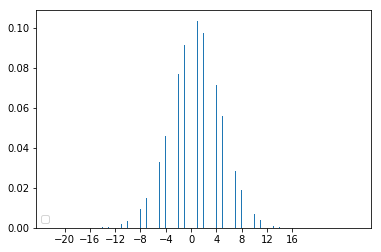

In [17]:
# a=data['k'].values[0]
a=[round(i) for i in a]
labels, values = zip(*sorted(Counter(a).items(),key=lambda i:i[0]))
values=[i/len(a) for i in values]
plt.bar(labels, values, 0.1)
plt.xticks(np.arange(-20,20,4))
plt.legend(loc='lower left')

In [20]:
s=[]
for i in exclude:
    if i in e_diction:
        s.append(e_diction[i])

In [21]:
np.mean([i for i in s if i>0])

3.143669179692774

In [22]:
np.mean([i for i in s if i<0])

-2.857678778727344

In [69]:
# exclude=set(word)-set(word[:2000])-set(word_re[:2000])
# exclude=set(set(word)-set(word[:20])-set(word_re[:20]))#&set(used_word)

In [70]:
# len(exclude)

10182

In [71]:
# include=list(word[:2000])+list(word_re[:2000])
# include=list(word[:20])+list(word_re[:20])

In [23]:
# in the dictionary
a=[]
for i in diction:
    try:
        sim=90-cosine2angle(projection(model[i],success_vector))
        a.append([i,sim,diction[i]])
    except Exception as e:
        print(i)
        pass

honour
b-day
x-mas
friend's
valentine's
great-grandchildren
favourite
colours
dad's
great-grandfather
favour
#music
great-grandmother
father's
4-bedroom
goodmorning
theatre
book's
colour
saviour
e-mail
family's
party's
1980s
80's
rudolph
bridegroom's
3-bedroom
realise
80s
t-shirt
eat-in
university's
v-day
1970s
1960s
america's
1980's
fund-raising
1990's
king's
2-car
father-in-law
tonight's
1970's
blu-ray
co-op
daughter-in-law
city's
lmaooo
brother-in-law
country's
front-page
japan's
programme
10pm
7-9pm
realised
sister-in-law
teen-agers
god's
group's
behaviour
yess
i'm
team's
1960's
#jobs
greenwich
#travel
21st
obama's
silkk
son-in-law
organisation
1950's
night's
tokio
rockville
vday
besos
#iphone
i've
long-term
#musicmonday
fairfield
jay-z
yonkers
analyses
11am
#nowplaying
centres
i'd
bailar
10am
centre
state's
treasury's
riverdale
defence
#letsbehonest
i'll
timbaland
yesterday's
lmaoo
trenton
yugoslavia
#news
lillian
someone's
two-year
#fact
*estimated
carnegie
irene
km/h
miriam
pres

In [73]:
# not in the dictionary
# anglesi = []
# for i in exclude:
#     try:
#         sim=90-cosine2angle(projection(model[i],success_vector))
#         anglesi.append([i,sim,diction[i]])
#     except Exception as e:
#         print(i)
#         pass  

@addthis
kurupt
programme
recuerdo
co-op
valentine's
c-after
favour
long-term
1980s
faggot
theatre
bosnia
goodmorning
4-bedroom
great-grandchildren
city's
yesterday's
@joejonas
o'connor
@nickjonas
t-shirt
80's
father-in-law
x-mas
herz
patient's
rosen
*estimated
-d
doesnt
nena
w/
@aplusk
obama's
zeg
'em
tonight's
llorar
1990's
wij
roslyn
@ddlovato
c-includes
@iamdiddy
god's
tweetdeck
murda
vday
dinkins
lautner
cancelled
=d
aiyyo
mij
canaan
10am
university's
'cause
digo
one-year
nooit
18th
jaja
court's
@theellenshow
killas
isnt
jigga
silkk
10th
friend's
vuoi
japan's
fund-raising
front-page
depois
#music
#quote
timbaland
#tcot
fordham
organisation
yonkers
17th
zij
acabo
@stephenfry
edwin
kijk
president's
labour
mayor's
13th
@jordanknight
@adamlambert
b-includes
governor's
rudolph
one-time
grey
trenton
sempre
#nowplaying
dmc
querer
sabes
lillian
#ohjustlikeme
#shoutout
treasury's
someone's
mother-in-law
c-included
yugoslavia
jajaja
quisiera
colours
after-tax
westport
great-grandmother
3-be

In [24]:
len(a)

9848

In [26]:
# r=round(stats.pearsonr([i[1] for i in anglesi], [i[2] for i in anglesi])[0],3)
r1=round(stats.pearsonr([i[1] for i in a], [i[2] for i in a])[0],3)
# p=round(stats.pearsonr([i[1] for i in anglesi], [i[2] for i in anglesi])[1],3)
p1=round(stats.pearsonr([i[1] for i in a], [i[2] for i in a])[1],3)

Text(0.5, 0, 'Fortunate score')

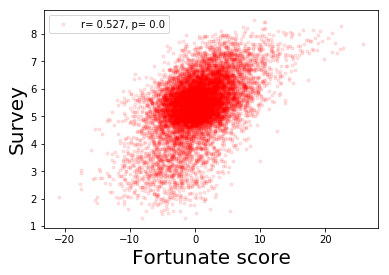

In [27]:
plt.plot([i[1] for i in a],[i[2] for i in a],'.',alpha=0.1,color='r',label='r= '+str(r1)+', '+'p= '+str(p1))
# plt.plot([i[1] for i in anglesi],[i[2] for i in anglesi],'.',alpha=0.1,color='b',label='r= '+str(r)+', '+'p= '+str(p))

plt.legend()
plt.ylabel('Survey',size=20)
plt.xlabel('Fortunate score',size=20)

Text(0.5, 0, 'Fortunate arc')

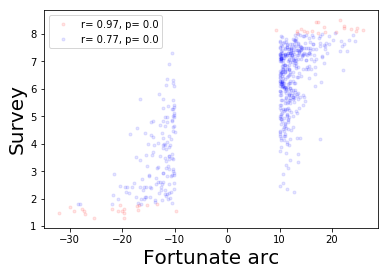

In [63]:
plt.plot([i[1] for i in a],[i[2] for i in a],'.',alpha=0.1,color='r',label='r= '+str(r1)+', '+'p= '+str(p1))
plt.plot([i[1] for i in anglesi],[i[2] for i in anglesi],'.',alpha=0.1,color='b',label='r= '+str(r)+', '+'p= '+str(p))

plt.legend()
plt.ylabel('Survey',size=20)
plt.xlabel('Fortunate arc',size=20)

#### model1

In [23]:
len(model1.wv.vocab.keys())

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


1193514

In [25]:
# word_score=[]
# for i in list(model1.wv.vocab.keys()):
#     sim=90-cosine2angle(projection(model1[i],success_vector1))
#     word_score.append([i,sim])

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [26]:
# len([i for i in word_score if i[1]>10])

3119

In [27]:
# len([i for i in word_score if i[1]<-10])

15329

In [29]:
# used_word=[i[0] for i in word_score if i[1]>10]+[i[0] for i in word_score if i[1]<-10]

In [30]:
# len(used_word)

18448

In [31]:
words=pd.read_csv('./words.csv')
word=words['word'].values
score=words['happiness_average'].values
diction=dict(zip(word,score))

In [77]:
# exclude=set(word)-set(word[:2000])-set(word_re[:2000])
# exclude=set(set(word)-set(word[:20])-set(word_re[:20]))#&set(used_word)

In [78]:
# len(exclude)

10182

In [79]:
# include=list(word[:2000])+list(word_re[:2000])
# include=list(word[:20])+list(word_re[:20])

In [29]:
# in the dictionary
a=[]
for i in diction:
    try:
        sim=90-cosine2angle(projection(model1[i],success_vector1))
        a.append([i,sim,diction[i]])
    except Exception as e:
        print(i)
        pass

mother's
friend's
valentine's
great-grandchildren
1st
children's
woman's
dad's
mom's
father's
4-bedroom
book's
child's
family's
party's
1980s
80's
mp3
women's
bridegroom's
gr8
3-bedroom
80s
eat-in
university's
life's
tomorrow's
1970s
1960s
america's
1980's
1990's
king's
today's
2-car
tonight's
everyone's
world's
3d
nation's
1970's
city's
2morrow
country's
japan's
10pm
7-9pm
teen-agers
6pm
god's
group's
master's
men's
ps3
7pm
i'm
team's
3g
9pm
1960's
5pm
21st
8pm
obama's
people's
1950's
2day
night's
we've
ya'll
i've
man's
we'll
#musicmonday
every1
she's
we're
11am
he'll
let's
2nite
i'd
10am
state's
treasury's
you'll
boldface
they'll
#letsbehonest
i'll
yesterday's
reposing
we'd
you'd
ohhhh
they're
someone's
#fact
*estimated
km/h
one's
president's
year's
you're
2-bath
that's
york's
clinton's
week's
#followfriday
there's
18th
agency's
john's
mayor's
china's
governor's
#tinychat
14th
81st
after-tax
she'll
10th
2pm
a1
it'll
y'all
1-bath
9th
=p
c-after
c/o
here's
viii
20th
4th
@dealsplus
he's

In [81]:
# not in the dictionary
# anglesi = []
# for i in exclude:
#     try:
#         sim=90-cosine2angle(projection(model1[i],success_vector1))
#         anglesi.append([i,sim,diction[i]])
#     except Exception as e:
#         print(i)
#         pass  

@addthis
8pm
3g
valentine's
he'll
they'll
c-after
can't
people's
1980s
6pm
year's
let's
it's
4-bedroom
8th
great-grandchildren
city's
yesterday's
@joejonas
@nickjonas
80's
she's
patient's
*estimated
-d
w/
@aplusk
what's
obama's
tonight's
1990's
@ddlovato
c-includes
@iamdiddy
god's
ibid
hadn't
child's
dinkins
aren't
=d
10am
university's
18th
court's
@theellenshow
would've
3rd
10th
friend's
5th
japan's
9pm
6am
b3
life's
week's
4th
b4
17th
nation's
@stephenfry
president's
mayor's
13th
@jordanknight
@adamlambert
b-includes
governor's
woman's
don't
isn't
haven't
#ohjustlikeme
treasury's
someone's
you'd
c-included
b1
incompletely
after-tax
y'all
couldn't
3-bedroom
w/o
gr8
#idothat2
party's
year-ago
12th
graveside
predeceased
1970's
bronxville
weren't
that'll
china's
@jonasbrothers
1960's
tomorrow's
mother's
king's
he'd
one's
viii
@donniewahlberg
#iranelection
#random
14th
a1
d1
children's
-p
flipmode
at;t
hasn't
i'd
father's
it'll
**municipal
#followfriday
b-included
i'm
master's
mom's
i've


In [31]:
# len(anglesi)

In [32]:
# r=round(stats.pearsonr([i[1] for i in anglesi], [i[2] for i in anglesi])[0],3)
r1=round(stats.pearsonr([i[1] for i in a], [i[2] for i in a])[0],3)
# p=round(stats.pearsonr([i[1] for i in anglesi], [i[2] for i in anglesi])[1],3)
p1=round(stats.pearsonr([i[1] for i in a], [i[2] for i in a])[1],3)

In [34]:
r1

0.399

Text(0.5, 0, 'Fortunate arc')

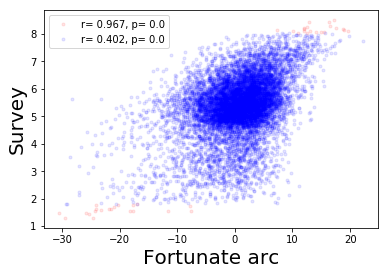

In [84]:
plt.plot([i[1] for i in a],[i[2] for i in a],'.',alpha=0.1,color='r',label='r= '+str(r1)+', '+'p= '+str(p1))
plt.plot([i[1] for i in anglesi],[i[2] for i in anglesi],'.',alpha=0.1,color='b',label='r= '+str(r)+', '+'p= '+str(p))

plt.legend()
plt.ylabel('Survey',size=20)
plt.xlabel('Fortunate arc',size=20)

Text(0.5, 0, 'Fortunate arc')

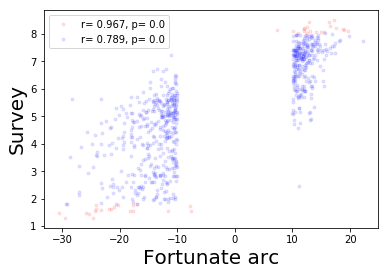

In [44]:
plt.plot([i[1] for i in a],[i[2] for i in a],'.',alpha=0.1,color='r',label='r= '+str(r1)+', '+'p= '+str(p1))
plt.plot([i[1] for i in anglesi],[i[2] for i in anglesi],'.',alpha=0.1,color='b',label='r= '+str(r)+', '+'p= '+str(p))

plt.legend()
plt.ylabel('Survey',size=20)
plt.xlabel('Fortunate arc',size=20)

#### model2

In [22]:
len(model2.wv.vocab.keys())

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


400000

In [23]:
word_score=[]
for i in list(model2.wv.vocab.keys()):
    sim=90-cosine2angle(projection(model2[i],success_vector2))
    word_score.append([i,sim])

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [39]:
# [i for i in word_score if i[0]=='overjoyed']

[['overjoyed', 14.866405965595717]]

In [24]:
# len([i for i in word_score if i[1]>10])

5649

In [25]:
# len([i for i in word_score if i[1]<-10])

2164

In [26]:
# used_word=[i[0] for i in word_score if i[1]>10]+[i[0] for i in word_score if i[1]<-10]

In [27]:
len(used_word)

7813

In [17]:
used_word[:10]

['i', 'you', 'team', 'game', 'very', 'my', 'season', 'good', 'won', 'best']

In [19]:
data=pd.DataFrame(used_word)

In [20]:
data.to_csv('./used_word.csv',index=False)

In [21]:
data.head()

,0
0,i
1,you
2,team
3,game
4,very


In [52]:
words=pd.read_csv('./words.csv')
word=words['word'].values
score=words['happiness_average'].values
diction=dict(zip(word,score))

In [86]:
# exclude=set(word)-set(word[:2000])-set(word_re[:2000])
exclude=set(set(word)-set(word[:20])-set(word_re[:20]))#&set(used_word)

In [87]:
len(exclude)

10182

In [88]:
# include=list(word[:2000])+list(word_re[:2000])
include=list(word[:20])+list(word_re[:20])

In [35]:
# in the dictionary
a=[]
for i in diction:
    try:
        sim=90-cosine2angle(projection(model2[i],success_vector2))
        a.append([i,sim,diction[i]])
    except Exception as e:
        print(i)
        pass

hahaha
hahahaha
hahahahaha
b-day
mother's
bday
friend's
valentine's
hahah
hahahah
children's
woman's
hehehe
awsome
dad's
#music
mom's
father's
4-bedroom
thanx
book's
child's
favorited
ahaha
family's
party's
80's
rofl
women's
bridegroom's
eat-in
university's
life's
tomorrow's
america's
1980's
1990's
king's
today's
tonight's
everyone's
world's
nation's
thnx
1970's
lolz
city's
lmaooo
2morrow
country's
japan's
7-9pm
teen-agers
god's
group's
lmao
master's
men's
yess
i'm
team's
knowin
1960's
#jobs
#travel
obama's
people's
1950's
night's
vday
we've
ya'll
#iphone
i've
man's
we'll
#musicmonday
every1
she's
we're
he'll
#nowplaying
let's
i'd
listenin
state's
treasury's
you'll
they'll
#letsbehonest
i'll
yesterday's
lmaoo
we'd
you'd
#news
they're
tmrw
someone's
urself
#fact
*estimated
one's
president's
year's
you're
2-bath
that's
york's
clinton's
week's
#followfriday
jajaja
there's
agency's
john's
mayor's
retweeting
china's
governor's
doet
#tinychat
she'll
haffi
it'll
knw
y'all
#fb
1-bath
c-after
h

In [90]:
# not in the dictionary
anglesi = []
for i in exclude:
    try:
        sim=90-cosine2angle(projection(model2[i],success_vector2))
        anglesi.append([i,sim,diction[i]])
    except Exception as e:
        print(i)
        pass  

@addthis
bwoy
valentine's
ahaha
he'll
they'll
c-after
can't
people's
unfollow
year's
sumthin
lolz
let's
it's
4-bedroom
city's
yesterday's
@joejonas
@nickjonas
80's
she's
patient's
*estimated
-d
w/
@aplusk
what's
obama's
zeg
tonight's
1990's
@ddlovato
c-includes
@iamdiddy
god's
hadn't
wrk
child's
vday
komt
aren't
aiyyo
bestie
staan
urself
university's
nooit
court's
@theellenshow
killas
youu
idk
would've
friend's
japan's
#music
life's
#quote
week's
#tcot
haffi
tooo
nation's
acabo
@stephenfry
kijk
president's
mayor's
@jordanknight
@adamlambert
b-includes
retweeting
governor's
woman's
don't
#nowplaying
isn't
haven't
#ohjustlikeme
#shoutout
treasury's
someone's
you'd
c-included
motherfucking
jajaja
y'all
thnx
retweet
couldn't
lmao
#idothat2
party's
year-ago
tmrw
1970's
estou
weren't
that'll
motherfuckin
shyt
china's
hahahaha
@jonasbrothers
1960's
tomorrow's
mother's
king's
he'd
o_o
one's
@donniewahlberg
knowin
tenho
#iranelection
#random
rofl
favorited
children's
-p
voel
at;t
hasn't
i'd
fat

In [91]:
len(anglesi)

9901

In [37]:
# r=round(stats.pearsonr([i[1] for i in anglesi], [i[2] for i in anglesi])[0],3)
r1=round(stats.pearsonr([i[1] for i in a], [i[2] for i in a])[0],3)
# p=round(stats.pearsonr([i[1] for i in anglesi], [i[2] for i in anglesi])[1],3)
p1=round(stats.pearsonr([i[1] for i in a], [i[2] for i in a])[1],3)

In [39]:
r1

0.468

Text(0.5, 0, 'Fortunate arc')

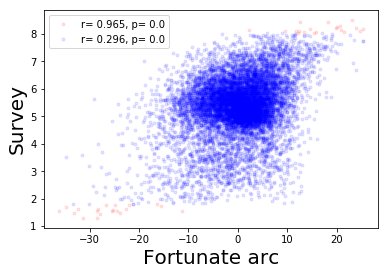

In [93]:
plt.plot([i[1] for i in a],[i[2] for i in a],'.',alpha=0.1,color='r',label='r= '+str(r1)+', '+'p= '+str(p1))
plt.plot([i[1] for i in anglesi],[i[2] for i in anglesi],'.',alpha=0.1,color='b',label='r= '+str(r)+', '+'p= '+str(p))

plt.legend()
plt.ylabel('Survey',size=20)
plt.xlabel('Fortunate arc',size=20)

Text(0.5, 0, 'Fortunate arc')

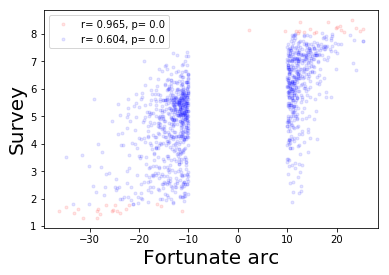

In [61]:
plt.plot([i[1] for i in a],[i[2] for i in a],'.',alpha=0.1,color='r',label='r= '+str(r1)+', '+'p= '+str(p1))
plt.plot([i[1] for i in anglesi],[i[2] for i in anglesi],'.',alpha=0.1,color='b',label='r= '+str(r)+', '+'p= '+str(p))

plt.legend()
plt.ylabel('Survey',size=20)
plt.xlabel('Fortunate arc',size=20)

### case

#### film script

In [75]:
with open('/Users/xuhuimin/storytelling/imsdb/Titanic.txt') as f:
    film_script_list = f.readlines()
    
film_script_list = film_script_list[11:-20]
film_script_str = ''.join(film_script_list)
tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus = [i for i in corpus if i != []]

wordlist=[]
for i in range(len(corpus)):
    wordlist.extend(corpus[i])
corpus=wordlist

corpus=[w for w in corpus if w not in string.punctuation]#2.11
corpus=[w for w in corpus if len(w)>1]#2.11

n_split = 10
corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]

In [25]:
anglesi = []
anglesi1 = []
for n in range (n_split):
    wordlist=corpus[n]
    wordlist = [x for x in wordlist if x not in stopwords.words('english')]
    w=[]
    w1=[]
    for word in wordlist:
        try:
            sim = 90-cosine2angle(projection(model[word],success_vector))
            if sim >= 10:
                w.append(word) #3.6
            if sim <= -10:
                w1.append(word)
        except:
            pass
    anglesi.append(w)
    anglesi1.append(w1)

In [29]:
anglesi[7]

['family',
 'understanding',
 'love',
 'family',
 'family',
 'family',
 'best',
 'practical',
 'music',
 'understanding',
 'reception',
 'dining',
 'dining',
 'great',
 'enjoy',
 'together',
 'dining',
 'dining',
 'reception',
 'together',
 'compliments',
 'together',
 'music']

In [30]:
anglesi1[7]

['int',
 'gonna',
 'tommy',
 'tommy',
 'terrified',
 'forcing',
 'shoving',
 'lock',
 'lock',
 'pounding',
 'shouting',
 'tommy',
 'scared',
 'mob',
 'tommy',
 'tommy',
 'hopeless',
 'goin',
 'panic',
 'favore',
 'america',
 'cut',
 'int',
 'cut',
 'int',
 'tommy',
 'lost',
 'confused',
 'wailing',
 'yelling',
 'scared',
 'loses',
 'damn',
 'hell',
 'bitch',
 'bolted',
 'pulling',
 'tommy',
 'tommy',
 'ram',
 'rips',
 'loose',
 'mssing',
 'cowering',
 'pathetic',
 'cont',
 'dumbly',
 'cut',
 'incompetent',
 'shouting',
 'wilde',
 'blowing',
 'shrilly',
 'fear',
 'fools',
 'cut',
 'int',
 'cut',
 'int',
 'bad',
 'cut',
 'int',
 'cut',
 'panic',
 'repeatedly',
 'warn',
 'lowe',
 'yells',
 'lowe',
 'left',
 'cut',
 'murdoch',
 'murdoch',
 'panic',
 'pushed',
 'downt',
 'panic',
 'ignored',
 'crushing',
 'barrett',
 'slap',
 'gunshots',
 'cut',
 'lowe',
 'firing',
 'warning',
 'threatening',
 'lowe',
 'blam',
 'blam',
 'cut',
 'murdoch',
 'mr',
 'murdoch',
 'cut',
 'left',
 'staring',
 'to

In [21]:
a=[]
for i in anglesi:
    a.append(len(i))

In [22]:
sum(a)

349

In [23]:
a1=[]
for i in anglesi1:
    a1.append(len(i))

In [24]:
sum(a1)

1854

In [70]:
with open('/Users/xuhuimin/storytelling/imsdb/Shawshank-Redemption,-The.txt') as f:
    film_script_list = f.readlines()

film_script_list = film_script_list[11:-20]
film_script_str = ''.join(film_script_list)
tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus = [i for i in corpus if i != []]

wordlist=[]
for i in range(len(corpus)):
    wordlist.extend(corpus[i])
corpus=wordlist

corpus=[w for w in corpus if w not in string.punctuation]#2.11
corpus=[w for w in corpus if len(w)>1]#2.11

n_split = 10
corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]

In [74]:
len(corpus[2])

2848

In [104]:
film_script_list=["Cinderella was a lovely girl",
"Her old mother died",
"Her father married a wife", 
"and the stepmother has brought two elder sisters",
"She does a lot of housework everyday",
"So the girl's clothes were very dirty",
"Everybody called her Cinderella",
"The prince gave all the females an invitation", 
"asked them to come in the palace to join the dance party", 
"But Cinderella’s stepmother didn’t let her go",
"The day of the party arrived. Cinderella met a fairy godmother",
"She gave Cinderella a coach, two shoots, two horses and a beautiful dress",
"But magic will stop working at midnight",
"Cinderella arrived at the palace and walked into the dance hall", 
"The Prince saw her. He danced only with Cinderella, and he fell in love with her",
"A clock chiming reminded Cinderella of her fairy godmother's warning",
"She ran out of the palace. The Prince only found Cinderella’s one glass shoot",
"The next morning, The Prince proclaimed: Whoever the shoot fits, shall be wife to him",
"He arrived at the stepmother's house",
"And Cinderella’s sisters can’t fit the shoot. But she can",
"Then Cinderella took the other shoot from her pocket and put it on",
"Finally, the Prince and Cinderella were married. They lived happily ever after"]

In [105]:
film_script_str = ','.join(film_script_list)
tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus=[w for w in corpus[0] if w not in string.punctuation]#2.11
corpus=[w for w in corpus if len(w)>1]#2.11
corpus = [i for i in corpus if i != []]

In [107]:
a=[]
for word in corpus:
        try:
            sim = 90-cosine2angle(projection(model[word],success_vector))
            a.append([word,sim])
        except:
            pass

In [108]:
d=pd.DataFrame(a)

In [110]:
d[d[1]>10]

,0,1
2,lovely,14.677695
68,godmother,10.037469
77,beautiful,18.061054
108,love,10.154500
117,godmother,10.037469


In [111]:
d[d[1]<-10]

,0,1
30,dirty,-16.088600
56,didn,-11.889723
118,warning,-10.746688


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


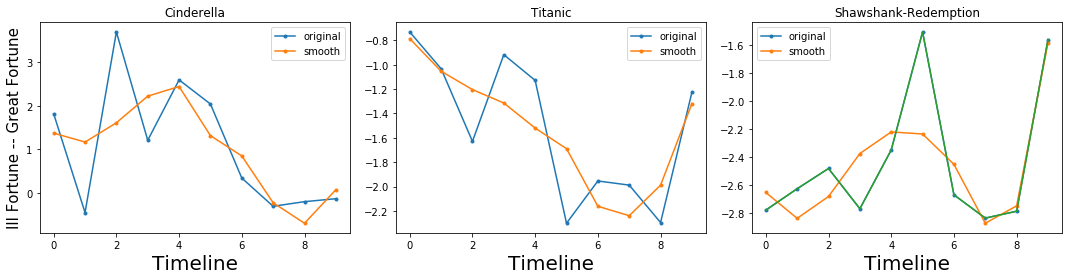

In [46]:
#先求分数再算平均
fig = plt.figure(figsize=(15,4))
ax=fig.add_subplot(131)

film_script_str = ','.join(film_script_list)
tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus=[w for w in corpus[0] if w not in string.punctuation]#2.11
corpus=[w for w in corpus if len(w)>1]#2.11
corpus = [i for i in corpus if i != []]
# corpus=corpus[0]
n_split = 10
corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]
anglesi = []
anglesi1 = []
for n in range (n_split):
    wordlist=corpus[n]
    wordlist = [x for x in wordlist if x not in stopwords.words('english')]
    w=[]
    w1=[]
    for word in wordlist:
        try:
            sim = 90-cosine2angle(projection(model[word],success_vector))
            if sim >= 10:
                w.append(sim) #3.6
            if sim <= 10:
                w1.append(sim)
        except:
            pass
    anglesi.append(np.mean(w))
    anglesi1.append(np.mean(w1))
exa = np.array(anglesi)
exa1 = np.array(anglesi1)
# exa1 = savgol_filter(exa, 7, 3)

plt.plot(range(len(anglesi)),exa,'.-',label='original')
plt.plot(range(len(anglesi1)),exa1,'.-',label='smooth')
plt.legend()
plt.title('Cinderella')
plt.ylabel('Ill Fortune -- Great Fortune',size=15)
plt.xlabel('Timeline',size=20)


ax=fig.add_subplot(132)
with open('/Users/xuhuimin/storytelling/imsdb/Titanic.txt') as f:
    film_script_list = f.readlines()
    
film_script_list = film_script_list[11:-20]
film_script_str = ''.join(film_script_list)
tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus = [i for i in corpus if i != []]

wordlist=[]
for i in range(len(corpus)):
    wordlist.extend(corpus[i])
corpus=wordlist

corpus=[w for w in corpus if w not in string.punctuation]#2.11
corpus=[w for w in corpus if len(w)>1]#2.11

n_split = 10
corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]
anglesi = []
for n in range (n_split):
    wordlist=corpus[n]
    wordlist = [x for x in wordlist if x not in stopwords.words('english')]
    w=[]
    for word in wordlist:
        try:
            sim = 90-cosine2angle(projection(model[word],success_vector))
            if (sim >= 10) or (sim <= 10):
                w.append(sim) #3.6
        except:
            pass
    anglesi.append(np.mean(w))
exa = np.array(anglesi)
exa1 = savgol_filter(exa, 7, 3)

plt.plot(range(len(anglesi)),exa,'.-',label='original')
plt.plot(range(len(anglesi)),exa1,'.-',label='smooth')
plt.legend()
plt.title('Titanic')
plt.xlabel('Timeline',size=20)


ax=fig.add_subplot(133)
with open('/Users/xuhuimin/storytelling/imsdb/Shawshank-Redemption,-The.txt') as f:
    film_script_list = f.readlines()

film_script_list = film_script_list[11:-20]
film_script_str = ''.join(film_script_list)
tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus = [i for i in corpus if i != []]

wordlist=[]
for i in range(len(corpus)):
    wordlist.extend(corpus[i])
corpus=wordlist

corpus=[w for w in corpus if w not in string.punctuation]#2.11
corpus=[w for w in corpus if len(w)>1]#2.11

n_split = 10
corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]
anglesi = []
for n in range (n_split):
    wordlist=corpus[n]
    wordlist = [x for x in wordlist if x not in stopwords.words('english')]
    w=[]
    for word in wordlist:
        try:
            sim = 90-cosine2angle(projection(model[word],success_vector))
            if (sim >= 10) or (sim <= 10):
                w.append(sim) #3.6
        except:
            pass
    anglesi.append(np.mean(w))
exa = np.array(anglesi)
exa1 = savgol_filter(exa, 7, 3)

plt.plot(range(len(anglesi)),exa,'.-',label='original')
plt.plot(range(len(anglesi)),exa1,'.-',label='smooth')
plt.legend()
plt.title('Shawshank-Redemption')
plt.xlabel('Timeline',size=20)
plt.plot(range(len(anglesi)),anglesi,label='original')

# plt.savefig('./picture/case.png', dpi=200)
plt.tight_layout()
plt.show()


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


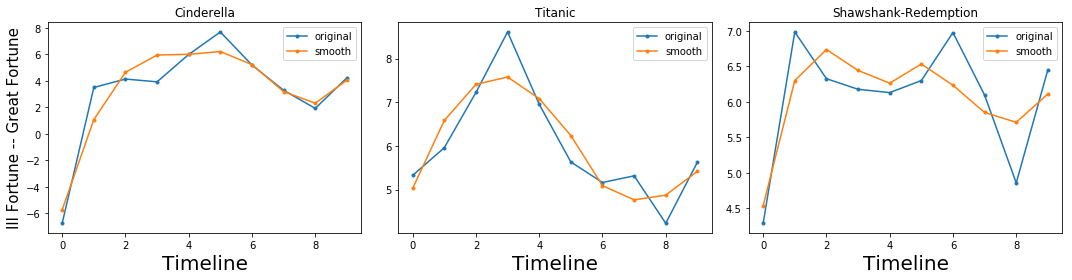

In [423]:
#先求平均再算分数
fig = plt.figure(figsize=(15,4))
ax=fig.add_subplot(131)

film_script_str = ','.join(film_script_list)
tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus=[w for w in corpus[0] if w not in string.punctuation]#2.11
corpus=[w for w in corpus if len(w)>1]#2.11
corpus = [i for i in corpus if i != []]
# corpus=corpus[0]
n_split = 10
corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]
anglesi = []
for n in range (n_split):
    wordlist=corpus[n]
    story_vector=storyv(model,wordlist)
#     anglesi.append(projection(story_vector,success_vector)) #相似性
    anglesi.append(90-cosine2angle(projection(story_vector,success_vector))) #长度换角度  
# anglesi=normalized(anglesi)
exa = np.array(anglesi)
exa1 = savgol_filter(exa, 7, 3)

plt.plot(range(len(anglesi)),exa,'.-',label='original')
plt.plot(range(len(anglesi)),exa1,'.-',label='smooth')
plt.legend()
plt.title('Cinderella')
plt.ylabel('Ill Fortune -- Great Fortune',size=15)
plt.xlabel('Timeline',size=20)


ax=fig.add_subplot(132)
with open('/Users/xuhuimin/storytelling/imsdb/Titanic.txt') as f:
    film_script_list = f.readlines()
    
film_script_list = film_script_list[11:-20]
film_script_str = ''.join(film_script_list)
tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus = [i for i in corpus if i != []]

wordlist=[]
for i in range(len(corpus)):
    wordlist.extend(corpus[i])
corpus=wordlist

corpus=[w for w in corpus if w not in string.punctuation]#2.11
corpus=[w for w in corpus if len(w)>1]#2.11

n_split = 10
corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]
anglesi = []
for n in range (n_split):
    story_vector=storyv(model,corpus[n])
    anglesi.append(90-cosine2angle(projection(story_vector,success_vector)))

exa = np.array(anglesi)
exa1 = savgol_filter(exa, 7, 3)

plt.plot(range(len(anglesi)),exa,'.-',label='original')
plt.plot(range(len(anglesi)),exa1,'.-',label='smooth')
plt.legend()
plt.title('Titanic')
plt.xlabel('Timeline',size=20)
# plt.plot(range(len(anglesi)),anglesi,label='original')
# if p30[1] > 0:
#     plt.plot(range(len(anglesi)), p30(range(len(anglesi))), '-', color='r', alpha=0.3,label='fit')
# else:
#     plt.plot(range(len(anglesi)), p30(range(len(anglesi))), '-', color='g', alpha=0.3,label='fit')

# plt.legend()

ax=fig.add_subplot(133)
with open('/Users/xuhuimin/storytelling/imsdb/Shawshank-Redemption,-The.txt') as f:
    film_script_list = f.readlines()
film_script_list = film_script_list[11:-20]
film_script_str = ''.join(film_script_list)

tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus = [i for i in corpus if i != []]

wordlist=[]
for i in range(len(corpus)):
    wordlist.extend(corpus[i])
corpus=wordlist

corpus=[w for w in corpus if w not in string.punctuation]#2.11
corpus=[w for w in corpus if len(w)>1]#2.11

n_split = 10
corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]
anglesi = []
for n in range (n_split):
    story_vector=storyv(model,corpus[n])
    anglesi.append(90-cosine2angle(projection(story_vector,success_vector)))

exa = np.array(anglesi)
exa1 = savgol_filter(exa, 7, 3)

plt.plot(range(len(anglesi)),exa,'.-',label='original')
plt.plot(range(len(anglesi)),exa1,'.-',label='smooth')
plt.legend()
plt.title('Shawshank-Redemption')
plt.xlabel('Timeline',size=20)
# plt.plot(range(len(anglesi)),anglesi,label='original')
# if p30[1] > 0:
#     plt.plot(range(len(anglesi)), p30(range(len(anglesi))), '-', color='r', alpha=0.3,label='fit')
# else:
#     plt.plot(range(len(anglesi)), p30(range(len(anglesi))), '-', color='g', alpha=0.3,label='fit')



plt.savefig('./picture/case.png', dpi=200)
plt.tight_layout()
plt.show()


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


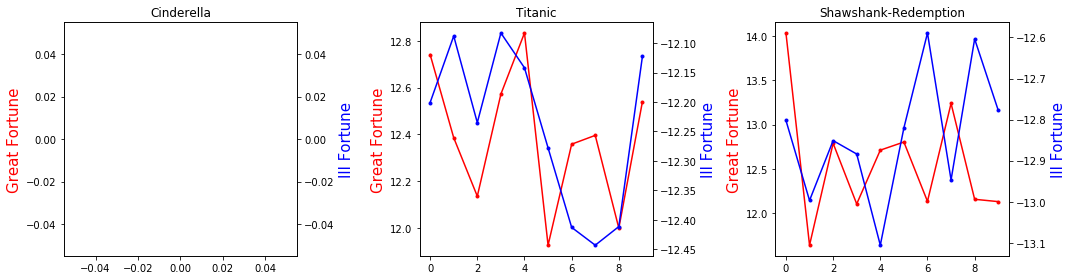

In [201]:
#先求分数再算平均
fig = plt.figure(figsize=(15,4))
ax=fig.add_subplot(131)

film_script_str = ','.join(film_script_list)
tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus=[w for w in corpus[0] if w not in string.punctuation]#2.11
corpus=[w for w in corpus if len(w)>1]#2.11
corpus = [i for i in corpus if i != []]
# corpus=corpus[0]
n_split = 10
corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]
anglesi = []
anglesi1 = []
for n in range (n_split):
    wordlist=corpus[n]
    wordlist = [x for x in wordlist if x not in stopwords.words('english')]
    w=[]
    w1=[]
    for word in wordlist:
        try:
            sim = 90-cosine2angle(projection(model[word],success_vector))
            if sim >= 10:
                w.append(sim) #3.6
            if sim <= -10:
                w1.append(sim)
        except:
            pass
    anglesi.append(np.mean(w))
    anglesi1.append(np.mean(w1))
exa = np.array(anglesi)
exa1 = np.array(anglesi1)
# exa1 = savgol_filter(exa, 7, 3)

plt.plot(range(len(anglesi)),exa,'.-',color='red')
plt.ylabel('Great Fortune',size=15,color='r')
ax1 = ax.twinx()  
plt.plot(range(len(anglesi1)),exa1,'.-',color='blue')
plt.title('Cinderella')
plt.ylabel('Ill Fortune',size=15,color='b')
plt.xlabel('Timeline',size=20)


ax=fig.add_subplot(132)
with open('/Users/xuhuimin/storytelling/imsdb/Titanic.txt') as f:
    film_script_list = f.readlines()
    
film_script_list = film_script_list[11:-20]
film_script_str = ''.join(film_script_list)
tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus = [i for i in corpus if i != []]

wordlist=[]
for i in range(len(corpus)):
    wordlist.extend(corpus[i])
corpus=wordlist

corpus=[w for w in corpus if w not in string.punctuation]#2.11
corpus=[w for w in corpus if len(w)>1]#2.11

n_split = 10
corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]
anglesi = []
anglesi1 = []
for n in range (n_split):
    wordlist=corpus[n]
    wordlist = [x for x in wordlist if x not in stopwords.words('english')]
    w=[]
    w1=[]
    for word in wordlist:
        try:
            sim = 90-cosine2angle(projection(model[word],success_vector))
            if sim >= 10:
                w.append(sim) #3.6
            if sim <= -10:
                w1.append(sim)
        except:
            pass
    anglesi.append(np.mean(w))
    anglesi1.append(np.mean(w1))
exa = np.array(anglesi)
exa1 = np.array(anglesi1)

plt.plot(range(len(anglesi)),exa,'.-',color='red')
plt.ylabel('Great Fortune',size=15,color='r')
ax1 = ax.twinx()  
plt.plot(range(len(anglesi1)),exa1,'.-',color='blue')
plt.title('Titanic')
plt.ylabel('Ill Fortune',size=15,color='b')
plt.xlabel('Timeline',size=20)


ax=fig.add_subplot(133)
with open('/Users/xuhuimin/storytelling/imsdb/Shawshank-Redemption,-The.txt') as f:
    film_script_list = f.readlines()

film_script_list = film_script_list[11:-20]
film_script_str = ''.join(film_script_list)
tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus = [i for i in corpus if i != []]

wordlist=[]
for i in range(len(corpus)):
    wordlist.extend(corpus[i])
corpus=wordlist

corpus=[w for w in corpus if w not in string.punctuation]#2.11
corpus=[w for w in corpus if len(w)>1]#2.11

n_split = 10
corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]
anglesi = []
anglesi1 = []
for n in range (n_split):
    wordlist=corpus[n]
    wordlist = [x for x in wordlist if x not in stopwords.words('english')]
    w=[]
    w1=[]
    for word in wordlist:
        try:
            sim = 90-cosine2angle(projection(model[word],success_vector))
            if sim >= 10:
                w.append(sim) #3.6
            if sim <= -10:
                w1.append(sim)
        except:
            pass
    anglesi.append(np.mean(w))
    anglesi1.append(np.mean(w1))
exa = np.array(anglesi)
exa1 = np.array(anglesi1)

plt.plot(range(len(anglesi)),exa,'.-',color='red')
plt.ylabel('Great Fortune',size=15,color='r')
ax1 = ax.twinx()  
plt.plot(range(len(anglesi1)),exa1,'.-',color='blue')
plt.title('Shawshank-Redemption')
plt.ylabel('Ill Fortune',size=15,color='b')
plt.xlabel('Timeline',size=20)


# plt.savefig('./picture/case.png', dpi=200)
plt.tight_layout()
plt.show()


In [221]:
with open('/Users/xuhuimin/storytelling/imsdb/Titanic.txt') as f:
    film_script_list = f.readlines()
    
film_script_list = film_script_list[11:-20]
film_script_str = ''.join(film_script_list)
tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus = [i for i in corpus if i != []]

wordlist=[]
for i in range(len(corpus)):
    wordlist.extend(corpus[i])
corpus=wordlist

corpus=[w for w in corpus if w not in string.punctuation]#2.11
corpus=[w for w in corpus if len(w)>1]#2.11

n_split = 10
corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]
anglesi = []
anglesi1 = []
for n in range (n_split):
    wordlist=corpus[n]
    wordlist = [x for x in wordlist if x not in stopwords.words('english')]
    w=[]
    w1=[]
    for word in wordlist:
        try:
            sim = 90-cosine2angle(projection(model[word],success_vector))
            if sim >= 10:
                w.append(sim) #3.6
            if sim <= -10:
                w1.append(sim)
        except:
            pass
    l=min(len(w),len(w1))
    anglesi.append(np.mean(sorted(w,reverse=True)[:l]))
    anglesi1.append(np.mean(sorted(w1)[:l]))
exa = np.array(anglesi)
exa1 = np.array(anglesi1)

# ax1 = ax.twinx()  
# plt.plot(range(len(anglesi1)),[exa[i] + exa1[i] for i in range(len(exa))],'.-',color='blue')
# plt.title('Titanic')
# plt.ylabel('Ill Fortune',size=15,color='b')
# plt.xlabel('Timeline',size=20)

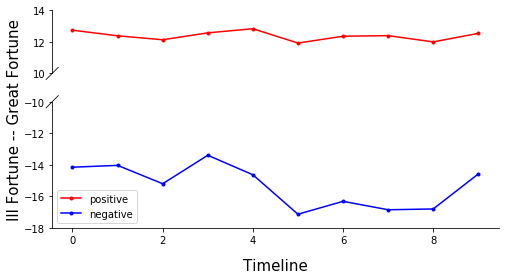

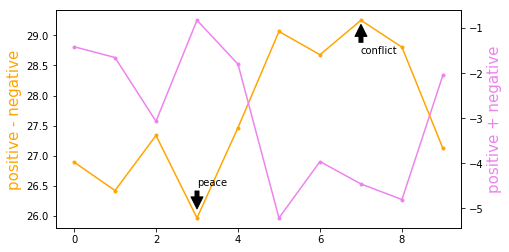

In [310]:
fig = plt.figure(figsize=(8,4))
bax = brokenaxes(ylims=((int(min(exa1))-1, -10), (10, int(max(exa))+2)), hspace=0.3)
bax.plot(range(len(anglesi)),exa,'.-',color='red',label='positive')
bax.plot(range(len(anglesi1)),exa1,'.-',color='blue',label='negative')
bax.set_xlabel('Timeline',size=15)
bax.set_ylabel('Ill Fortune -- Great Fortune',size=15)
bax.legend(loc=3)

fig = plt.figure(figsize=(16,4))
ax=fig.add_subplot(1,2,1)
c = [exa[i] - exa1[i] for i in range(len(exa))]
c1 = [exa[i] + exa1[i] for i in range(len(exa))]
plt.plot(range(len(c)),c,'.-',color='orange')
plt.annotate('peace', xy=(3,26.1), xytext=(3,26.5),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('conflict', xy=(7,29.2), xytext=(7,28.7),arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylabel('positive - negative',fontsize=15,color='orange')
ax1 = ax.twinx()
plt.plot(range(len(c1)),c1,'.-',color='violet')
plt.ylabel('positive + negative',fontsize=15,color='violet')
plt.show()
plt.show()

#### film synopsis

In [56]:
with open('./IMDB/synopsis/0120338.txt','r') as f:
    film_script_str=f.read()

tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus = [i for i in corpus if i != []]

wordlist=[]
for i in range(len(corpus)):
    wordlist.extend(corpus[i])
corpus=wordlist

corpus=[w for w in corpus if w not in string.punctuation]#2.11
corpus=[w for w in corpus if len(w)>1]#2.11

n_split = 10
corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]

anglesi = []
anglesi1 = []
anglesi2 = []
for n in range (n_split):
    wordlist=corpus[n]
    wordlist = [x for x in wordlist if x not in stopwords.words('english')]
    w=[]
    w1=[]
    w2=[]
    for word in wordlist:
        try:
            sim = 90-cosine2angle(projection(model2[word],success_vector2))
            w2.append(sim)
            if sim >= 5:
                w.append(sim) #3.6
            if sim <= -5:
                w1.append(sim)
        except:
            pass
    l=min(len(w),len(w1))
    anglesi.append(np.mean(sorted(w,reverse=True)[:l]))
    anglesi1.append(np.mean(sorted(w1)[:l]))
    anglesi2.append(np.mean(w2))
exa = np.array(anglesi)
exa1 = np.array(anglesi1)
exa2 =np.array(anglesi2)

### storytelling

#### film script

In [ ]:
with open('./stopword.txt','r') as f:
    stopword=f.readlines()   
stopword=[i.split('\n')[0] for i in stopword]

angels=[]
angels1=[]
angels2=[]

files=glob('./imsdb/*')
for k in range(len(files)):
    flushPrint(k)
    with open(files[k]) as f:
        film_script_list = f.readlines()
    try:
        film_script_list = film_script_list[20:-20]
        film_script_str = ''.join(film_script_list)

        tknzr = WordPunctTokenizer()
        corpus = tknzr.tokenize(film_script_str.lower())
        
        corpus=[w for w in corpus if w not in string.punctuation]#2.11
        corpus=[w for w in corpus if len(w)>1]#2.11


        n_split = 10
        corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]

        anglesi = []
        anglesi1 = []
        anglesi2 = []
        for n in range (n_split):
            wordlist=corpus[n]
            wordlist = [x for x in wordlist if x not in stopword]
            w=[]
            w1=[]
            w2=[]
            for word in wordlist:
                try:
                    sim = 90-cosine2angle(projection(model[word],success_vector))
                    w2.append(sim)
                    if sim >= 5:
                        w.append(sim) #3.6
                    if sim <= -5:
                        w1.append(sim)
                except:
                    pass
            l=min(len(w),len(w1))
            anglesi.append(np.mean(sorted(w,reverse=True)[:l]))
            anglesi1.append(np.mean(sorted(w1)[:l]))
            anglesi2.append(np.mean(w2))
        angels.append([files[k],anglesi])
        angels1.append([files[k],anglesi1])
        angels2.append([files[k],anglesi2])     
    except Exception as e:
        print(e)
        print(files[k], 'wrong')
        pass  

name=[i[0].split('/')[-1].split('.')[0] for i in angels]

vec=[i[1] for i in angels]
vec1=[i[1] for i in angels1]
vec2=[i[1] for i in angels2]

diction=dict(zip(name,vec))
diction1=dict(zip(name,vec1))
diction2=dict(zip(name,vec2))
movie_type=pd.read_csv('./movie_type.csv')
movie_type['positive1']=movie_type['name'].apply(lambda x: diction[x] if x in diction
                                          else np.nan)
movie_type['negative1']=movie_type['name'].apply(lambda x: diction1[x] if x in diction1
                                          else np.nan)
movie_type['overall']=movie_type['name'].apply(lambda x: diction2[x] if x in diction2
                                          else np.nan)
movie_type.to_csv('./movie_type.csv',index=False)

#### film synopsis

In [4]:
with open('./stopword.txt','r') as f:
    stopword=f.readlines()   
stopword=[i.split('\n')[0] for i in stopword]

angels=[]
angels1=[]
angels2=[]
files=glob('./IMDB/synopsis/*.txt')

for k in range(len(files)):
    flushPrint(k)
    with open(files[k]) as f:
        film_script_list = f.readlines()
    try:
        film_script_str = ''.join(film_script_list)

        tknzr = WordPunctTokenizer()
        corpus = tknzr.tokenize(film_script_str.lower())
        
        corpus=[w for w in corpus if w not in string.punctuation]#2.11
        corpus=[w for w in corpus if len(w)>1]#2.11


        n_split = 10
        corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]


        anglesi = []
        anglesi1 = []
        anglesi2 = []
        for n in range (n_split):
            wordlist=corpus[n]
            wordlist = [x for x in wordlist if x not in stopword]
            w=[]
            w1=[]
            w2=[]
            for word in wordlist:
                try:
                    sim = 90-cosine2angle(projection(model[word],success_vector))
                    w2.append(sim)
                    if sim >= 2:
                        w.append(sim) #3.6
                    if sim <= -2:
                        w1.append(sim)
                except:
                    pass
            l=min(len(w),len(w1))
            anglesi.append(np.mean(sorted(w,reverse=True)[:l]))
            anglesi1.append(np.mean(sorted(w1)[:l]))
            anglesi2.append(np.mean(w2))
        angels.append([files[k],anglesi])
        angels1.append([files[k],anglesi1])
        angels2.append([files[k],anglesi2])     
    except Exception as e:
        print(e)
        print(files[k], 'wrong')
        pass  

name=['tt'+i[0].split('/')[-1].split('.')[0] for i in angels]

vec=[i[1] for i in angels]
vec1=[i[1] for i in angels1]
vec2=[i[1] for i in angels2]
diction=dict(zip(name,vec))
diction1=dict(zip(name,vec1))
diction2=dict(zip(name,vec2))
movie_type=pd.read_csv('./IMDB.csv')
movie_type['positive1']=movie_type['tconst'].apply(lambda x: diction[x] if x in diction
                                          else np.nan)
movie_type['negative1']=movie_type['tconst'].apply(lambda x: diction1[x] if x in diction1
                                          else np.nan)
movie_type['overall']=movie_type['tconst'].apply(lambda x: diction2[x] if x in diction2
                                          else np.nan)
movie_type.to_csv('./IMDB.csv',index=False)

#### book

In [78]:
with open ('./gutenberg/corpus/42766.txt') as f:
    data=f.readlines()

In [86]:
for i in range(30,len(data)-1):
    if (len(re.split(r'\s+',data[i]))>10)&(len(re.split(r'\s+',data[i+1]))>10):
        index=i# choose the content
        break
end=[i for i,x in enumerate(data) if x.find('End of the Project Gutenberg EBook')!=-1]
index1=[end[0] if len(end)!=0 else -1][0]

film_script_list=data[index:index1]

film_script_str = ''.join(film_script_list)
tknzr = WordPunctTokenizer()
corpus = tknzr.tokenize(film_script_str.lower())

In [160]:
with open('./stopword.txt','r') as f:
    stopword=f.readlines()   
stopword=[i.split('\n')[0] for i in stopword]

angels=[]
angels1=[]
angels2=[]
files=glob('./gutenberg/corpus/*.txt')
for k in range(len(files)):
    flushPrint(k)
    with open(files[k],'r',encoding='ISO-8859-1') as f:
        data=f.readlines()
    try:
        for i in range(30,len(data)-1):
            if (len(re.split(r'\s+',data[i]))>10)&(len(re.split(r'\s+',data[i+1]))>10):
                index=i# choose the content
                break
        end=[i for i,x in enumerate(data) if x.find('End of the Project Gutenberg EBook')!=-1]
        index1=[end[0] if len(end)!=0 else -1][0]

        film_script_list=data[index:index1]

        film_script_str = ''.join(film_script_list)
        tknzr = WordPunctTokenizer()
        corpus = tknzr.tokenize(film_script_str.lower())

        corpus=[w for w in corpus if w not in string.punctuation]#2.11
        corpus=[w for w in corpus if len(w)>1]#2.11

        n_split = 10
        corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]

        anglesi = []
        anglesi1 = []
        anglesi2 = []
        for n in range (n_split):
            wordlist=corpus[n]
            wordlist = [x for x in wordlist if x not in stopword]
            w=[]
            w1=[]
            w2=[]
            for word in wordlist:
                try:
                    sim = 90-cosine2angle(projection(model[word],success_vector))
                    w2.append(sim)
                    if sim >= 5:
                        w.append(sim) #3.6
                    if sim <= -5:
                        w1.append(sim)
                except:
                    pass
            l=min(len(w),len(w1))
            anglesi.append(np.mean(sorted(w,reverse=True)[:l]))
            anglesi1.append(np.mean(sorted(w1)[:l]))
            anglesi2.append(np.mean(w2))
        angels.append([files[k],anglesi])
        angels1.append([files[k],anglesi1])
        angels2.append([files[k],anglesi2])     
    except Exception as e:
        print(e)
        print(files[k], 'wrong')
        pass  

6

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


15

In [ ]:
data

In [148]:
name=[i[0].split('/')[-1].split('.')[0] for i in angels]
vec=[i[1] for i in angels]
vec1=[i[1] for i in angels1]
vec2=[i[1] for i in angels2]

d=pd.DataFrame()

d['no']=name
d['positive']=vec
d['negative']=vec1
d['overall']=vec2

d.to_csv('./gutenberg/1.csv',index=False,header=False)

In [135]:
name=[i[0].split('/')[-1].split('.')[0] for i in angels]
vec=[i[1] for i in angels]
vec1=[i[1] for i in angels1]
vec2=[i[1] for i in angels2]
diction=dict(zip(name,vec))
diction1=dict(zip(name,vec1))
diction2=dict(zip(name,vec2))

book=pd.read_csv('./gutenberg/metadata.csv')

book['positive']=book['no'].apply(lambda x: diction[x] if x in diction
                                          else np.nan)
book['negative']=book['no'].apply(lambda x: diction1[x] if x in diction1
                                          else np.nan)
book['overall']=book['no'].apply(lambda x: diction2[x] if x in diction2
                                          else np.nan)
book.to_csv('./gutenberg/metadata1.csv',index=False)

#### visulization

In [3]:
movie_type=pd.read_csv('./movie_type.csv',index_col=0)

In [4]:
movie_type.head()

,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,name,ending,type,IMSDb_rating,User_rating,Release_date,Script_date,gender,ending_10,vec,wordvec,wordvec100,wordvec200,mode,ending_100,gender10,wordvec10,wordvec10_0,wordvec10_1,wordvec10_2,wordvec10_3,wordvec10_4,wordvec10_reversed,wordvecscore,positive,negative
0,0,0,0,12-Monkeys,0.0,"Drama,Sci-Fi,Thriller,nan,nan,nan,nan",NaN,9.25,NaN,1994.0,0.0,1.0,"[5.622385321100918, 5.911052631578946, 5.39978...","[11.307730492605003, 10.991469650366682, 10.99...","[8.23082187576179, 12.77271117249029, 12.77271...","[10.024954274955448, 8.23082187576179, 8.23082...",-1.0,0.0,"[2.3351914478556495, 1.5174268538649045, 2.161...","[4.58099104821909, 5.186481780378202, 4.431446...","[3.926249943190655, 3.9212658827872247, 4.0319...","[4.16351742208343, 3.8545898024432574, 3.64899...","[4.02347549964864, 4.121286173295232, 3.938884...","[3.769502716018181, 3.6331519400775676, 3.4075...","[3.8994524098906, 3.9009332948411526, 3.602950...","[-3.6591605859386505, -4.168003046714944, -3.7...","[-1.4957342264877305, -2.1701359782260505, -2....","[13.188303584495426, 11.059522940827707, 13.03...","[-12.525809466309518, -12.241007828488135, -12..."
1,1,1,1,12-Years-a-Slave,0.0,"Drama,nan,nan,nan,nan,nan,nan",NaN,NaN,2013.0,NaN,0.0,0.0,"[6.753749999999996, 5.697450980392157, 4.73106...","[13.499752241438784, 13.08735227105251, 13.087...","[14.956624680212244, 14.956624680212244, 14.95...","[14.956624680212244, 14.956624680212244, 14.95...",-2.0,1.0,"[0.01990712034505293, 1.6808686898581726, 1.81...","[7.298366696319448, 4.488239150126205, 3.63658...","[3.4276908213461326, 4.139526611902568, 3.4988...","[3.6653584056340236, 3.457052140122542, 3.5932...","[3.902517729101362, 3.828416193950403, 3.44247...","[3.605005803035155, 3.4017173090116017, 3.0678...","[4.05832053060503, 3.700429576830004, 3.412489...","[-3.063478921304963, -3.504681757152042, -3.47...","[0.20679374678906337, -2.3299832689998694, -1....","[13.209774192978948, 11.995805106090085, 12.02...","[-12.025786060205554, -12.80778563031486, -13...."
2,2,2,2,127-Hours,0.0,"Adventure,Drama,Thriller,nan,nan,nan,nan",NaN,NaN,2010.0,NaN,0.0,0.0,"[6.827333333333333, 6.888750000000001, 5.81688...","[0.6101451800952304, 13.08735227105251, -0.659...","[8.088998279314495, 12.77271117249029, 12.7727...","[6.344458756247647, 8.088998279314495, 13.8692...",-1.0,0.0,"[2.792053597505003, 1.4353698876816168, 4.9652...","[5.655910322283944, 7.0436485443819805, 5.6674...","[3.5739456297756647, 3.7473350454084198, 3.810...","[3.741655143615219, 3.913585319029565, 3.71707...","[3.0164021895207753, 3.960260276636575, 4.0779...","[4.5071833895636075, 3.3479252867694242, 3.769...","[3.743572967297723, 3.2628946004216175, 3.9366...","[-4.202921173057888, -3.5092056239512743, -3.7...","[-1.7093101763330698, -1.6614404650208494, -2....","[13.489695415002615, 12.384936352898125, 13.31...","[-11.499173472638157, -11.369025506288633, -12..."
3,3,3,3,1492-Conquest-of-Paradise,0.0,"Adventure,Drama,nan,nan,nan,nan,nan",NaN,5.00,NaN,1991.0,0.0,0.0,"[6.4945535714285745, 6.647472527472528, 6.9833...","[-1.831013221486387, 12.95863330645571, 12.958...","[14.956624680212244, 14.956624680212244, 14.95...","[14.956624680212244, 14.956624680212244, 14.95...",5.0,1.0,"[3.304896663191741, 2.195984301405261, 1.64414...","[4.23021677445027, 5.376986858705706, 5.629540...","[3.5818032829500623, 3.410814757988163, 3.5759...","[3.345444685845962, 4.121389747740935, 3.88050...","[4.128390897974299, 3.7946888224665543, 3.6419...","[3.7996199449958397, 3.5476492209804746, 3.808...","[3.9307051569865052, 3.906380201273592, 3.3852...","[-3.782278998028062, -3.5086874791750517, -4.0...","[-1.2462648157662746, -1.3162071960726656, -1....","[12.926940879642732, 12.483830507251959, 12.72...","[-12.105860307701928, -11.909507937900827, -12..."
4,4,4,4,15-Minutes,0.0,"Action,Crime,Thriller,nan,nan,nan,nan",NaN,5.75,NaN,NaN,0.0,1.0,"[6.141799999999998, 5.6757647058823535, 5.8467...","[12.95863330645571, 

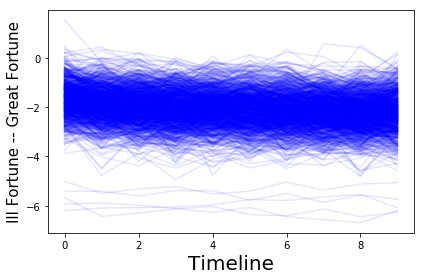

In [83]:
# 没有平滑
n_split=10
for i in angels:
    try:
        exa = np.array(eval(i[1]))
#         exa = normalized(exa)
#         exa = savgol_filter(exa, 7, 5)
        plt.plot(range(n_split),exa,color='b',label='smooth',alpha=0.1)
    except:
        pass

# example
# exa=[i[1] for i in angels if i[0]=='Shawshank-Redemption,-The'][0]
# plt.plot(range(n_split),savgol_filter(exa, 7, 5),color='g',label='smooth')
# plt.text(1,1,'Shawshank-Redemption',color='g')
# exa=[i[1] for i in angels if i[0]=='Titanic'][0]
# plt.plot(range(n_split),savgol_filter(exa, 7, 5),color='yellow',label='smooth')
# plt.text(3.5,0,'Titanic',color='yellow')
# exa=normalized(exa_c)
# plt.plot(range(n_split),exa,color='r',label='smooth')
# plt.text(6,1,'Cinderella',color='r')
plt.ylabel('Ill Fortune -- Great Fortune',size=15)
plt.xlabel('Timeline',size=20)
# plt.savefig('./picture/nosmooth_100.png',dpi=200)
plt.tight_layout()
plt.show()

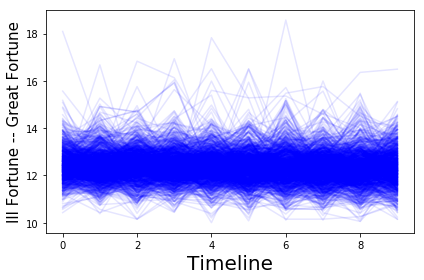

In [89]:
# 没有平滑
n_split=10
for i in angels1:
    try:
        exa = np.array(eval(i[1]))
#         exa = normalized(exa)
#         exa = savgol_filter(exa, 7, 5)
        plt.plot(range(n_split),exa,color='b',label='smooth',alpha=0.1)
    except:
        pass

# example
# exa=[i[1] for i in angels if i[0]=='Shawshank-Redemption,-The'][0]
# plt.plot(range(n_split),savgol_filter(exa, 7, 5),color='g',label='smooth')
# plt.text(1,1,'Shawshank-Redemption',color='g')
# exa=[i[1] for i in angels if i[0]=='Titanic'][0]
# plt.plot(range(n_split),savgol_filter(exa, 7, 5),color='yellow',label='smooth')
# plt.text(3.5,0,'Titanic',color='yellow')
# exa=normalized(exa_c)
# plt.plot(range(n_split),exa,color='r',label='smooth')
# plt.text(6,1,'Cinderella',color='r')
plt.ylabel('Ill Fortune -- Great Fortune',size=15)
plt.xlabel('Timeline',size=20)
# plt.savefig('./picture/nosmooth_100.png',dpi=200)
plt.tight_layout()
plt.show()

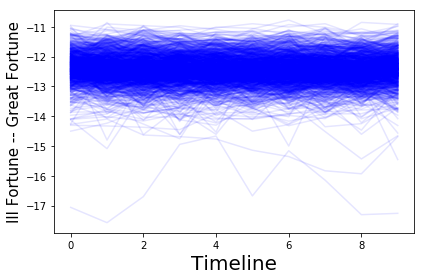

In [90]:
# 没有平滑
n_split=10
for i in angels2:
    try:
        exa = np.array(eval(i[1]))
#         exa = normalized(exa)
#         exa = savgol_filter(exa, 7, 5)
        plt.plot(range(n_split),exa,color='b',label='smooth',alpha=0.1)
    except:
        pass

# example
# exa=[i[1] for i in angels if i[0]=='Shawshank-Redemption,-The'][0]
# plt.plot(range(n_split),savgol_filter(exa, 7, 5),color='g',label='smooth')
# plt.text(1,1,'Shawshank-Redemption',color='g')
# exa=[i[1] for i in angels if i[0]=='Titanic'][0]
# plt.plot(range(n_split),savgol_filter(exa, 7, 5),color='yellow',label='smooth')
# plt.text(3.5,0,'Titanic',color='yellow')
# exa=normalized(exa_c)
# plt.plot(range(n_split),exa,color='r',label='smooth')
# plt.text(6,1,'Cinderella',color='r')
plt.ylabel('Ill Fortune -- Great Fortune',size=15)
plt.xlabel('Timeline',size=20)
# plt.savefig('./picture/nosmooth_100.png',dpi=200)
plt.tight_layout()
plt.show()

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


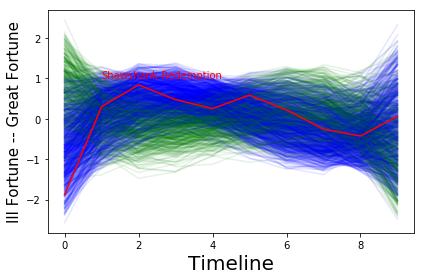

In [431]:
# with ending
up=[]
down=[]
for i in angels:  
    try:
        exa = np.array(i[1])
        exa = normalized(exa)
        exa = savgol_filter(exa, 7, 5)
        p30 = np.poly1d(np.polyfit(range(n_split),exa, 3))
        if p30[1] > 0:
            up.append(i[0])
            plt.plot(range(n_split), p30(range(len(exa))), '-', color='b', alpha=0.1)
        else:
            down.append(i[0])
            plt.plot(range(n_split), p30(range(len(exa))), '-', color='g', alpha=0.1)
    except:
        pass

exa=normalized([i[1] for i in angels if i[0]=='Shawshank-Redemption,-The'][0])
plt.plot(range(n_split),savgol_filter(exa, 7, 3),color='r',label='smooth')
plt.text(1,1,'Shawshank-Redemption',color='red')
plt.ylabel('Ill Fortune -- Great Fortune',size=15)
plt.xlabel('Timeline',size=20)
# plt.savefig('./picture/ending_100.png',dpi=200)
plt.tight_layout()
plt.show()


In [432]:
len(up)

702

In [433]:
len(down)

407

In [73]:
def mean(x):
    x=np.array(x)
    return(np.mean(x,axis=0),ss.sem(x,axis=0))
#     return(np.mean(x,axis=0),np.std(x,axis=0))

In [74]:
ang=[]
for i in angels1:
    try:
        exa = np.array(eval(i[1]))
    #     exa = savgol_filter(exa, 7, 5)
    #     exa = normalized(exa)
    #     p30 = np.poly1d(np.polyfit(range(n_split),exa, 3))
        ang.append(exa)
    except:
        pass
m,s=mean(ang)

In [75]:
m

array([-12.37174961, -12.415571  , -12.43578299, -12.44686941,
       -12.44368278, -12.45934297, -12.45163475, -12.45218114,
       -12.46260156, -12.40451218])

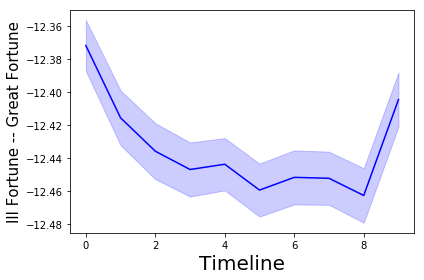

In [76]:
plt.plot(m,color='b')
plt.fill_between(range(10),np.array(m)-np.array(s),np.array(m)+np.array(s),alpha=0.2,color='b')
plt.ylabel('Ill Fortune -- Great Fortune',size=15)
plt.xlabel('Timeline',size=20)
plt.tight_layout()
# plt.savefig('./picture/endingmean_100.png',dpi=200)
plt.show()


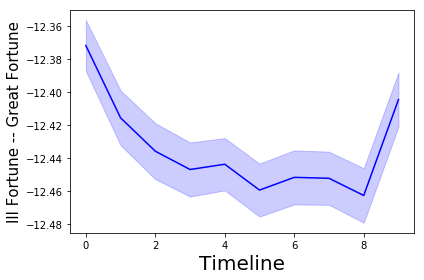

In [77]:
plt.plot(m,color='b')
plt.fill_between(range(10),np.array(m)-np.array(s),np.array(m)+np.array(s),alpha=0.2,color='b')
plt.ylabel('Ill Fortune -- Great Fortune',size=15)
plt.xlabel('Timeline',size=20)
plt.tight_layout()
# plt.savefig('./picture/endingmean_100.png',dpi=200)
plt.show()

In [123]:
len(up)

838

In [124]:
up=[u.split('/')[-1].split('.')[0] for u in up]

In [125]:
len(down)

271

In [126]:
down=[d.split('/')[-1].split('.')[0] for d in down]

In [133]:
movie_type=pd.read_csv('./movie_type.csv')

In [136]:
up_df=movie_type.loc[movie_type['name'].isin(up)].index

movie_type.ix[up_df,'ending_100']=0

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [137]:
down_df=movie_type.loc[movie_type['name'].isin(down)].index

movie_type.ix[down_df,'ending_100']=1

In [138]:
movie_type.to_csv('./movie_type.csv')

#### correlation

In [27]:
movie_type=pd.read_csv('./movie_type.csv',index_col=0)

In [28]:
data=movie_type[['User_rating','ending_100','gender']]

In [29]:
data=data.dropna(axis=0,how='any')

In [30]:
pd.crosstab(data['gender'],data['ending_100'],margins=True)

ending_100,0.0,1.0,All
gender,,,
0.0,418,159,577
1.0,143,39,182
All,561,198,759


In [31]:
data.pivot_table(index=['gender','ending_100'])

User_rating
gender ending_100             
0.0    0.0            8.533206
       1.0            8.386101
1.0    0.0            8.224476
       1.0            8.707949

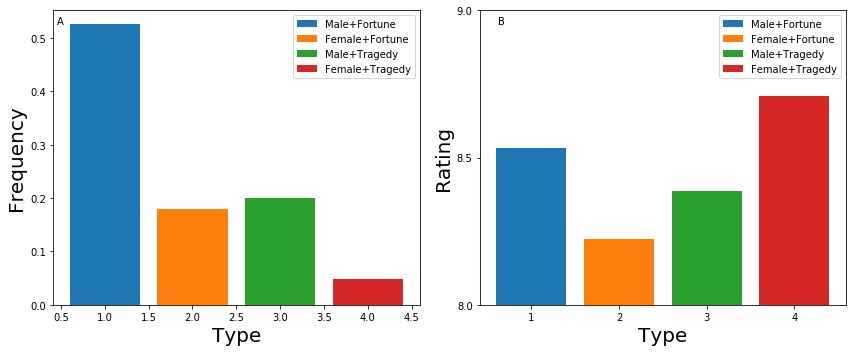

In [42]:
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(121)
plt.bar(1,418/795,label='Male+Fortune')
plt.bar(2,143/795,label='Female+Fortune')
plt.bar(3,159/795,label='Male+Tragedy')
plt.bar(4,39/795,label='Female+Tragedy')
plt.legend()
ax.text(0.01, 0.98,'A',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes,size=10)
plt.xlabel('Type',size=20)
plt.ylabel('Frequency',size=20)


ax=fig.add_subplot(122)
plt.bar(1,8.533206,label='Male+Fortune')
plt.bar(2,8.224476,label='Female+Fortune')
plt.bar(3,8.386101,label='Male+Tragedy')
plt.bar(4,8.707949,label='Female+Tragedy')
plt.xticks(range(1,5))
plt.yticks([8,8.5,9,9.5])
plt.ylim(range(8,10))
ax.text(0.05, 0.98,'B',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes,size=10)
plt.legend()
plt.xlabel('Type',size=20)
plt.ylabel('Rating',size=20)


plt.tight_layout()
plt.savefig('./picture/comparison', dpi=200)
plt.show()

### null model

In [11]:
movie_type=pd.read_csv('./movie_type.csv',index_col=0)

In [12]:
movie_type.head()

,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,name,ending,type,IMSDb_rating,User_rating,Release_date,Script_date,gender,ending_10,vec,wordvec,wordvec100,wordvec200,mode,ending_100,gender10,wordvec10,wordvec10_0,wordvec10_1,wordvec10_2,wordvec10_3,wordvec10_4,wordvec10_reversed
0,0,0,0,12-Monkeys,0.0,"Drama,Sci-Fi,Thriller,nan,nan,nan,nan",NaN,9.25,NaN,1994.0,0.0,1.0,"[5.622385321100918, 5.911052631578946, 5.39978...","[11.307730492605003, 10.991469650366682, 10.99...","[8.23082187576179, 12.77271117249029, 12.77271...","[10.024954274955448, 8.23082187576179, 8.23082...",-1.0,0.0,"[2.3351914478556495, 1.5174268538649045, 2.161...","[4.58099104821909, 5.186481780378202, 4.431446...","[3.926249943190655, 3.9212658827872247, 4.0319...","[4.16351742208343, 3.8545898024432574, 3.64899...","[4.02347549964864, 4.121286173295232, 3.938884...","[3.769502716018181, 3.6331519400775676, 3.4075...","[3.8994524098906, 3.9009332948411526, 3.602950...","[-3.6591605859386505, -4.168003046714944, -3.7..."
1,1,1,1,12-Years-a-Slave,0.0,"Drama,nan,nan,nan,nan,nan,nan",NaN,NaN,2013.0,NaN,0.0,0.0,"[6.753749999999996, 5.697450980392157, 4.73106...","[13.499752241438784, 13.08735227105251, 13.087...","[14.956624680212244, 14.956624680212244, 14.95...","[14.956624680212244, 14.956624680212244, 14.95...",-2.0,1.0,"[0.01990712034505293, 1.6808686898581726, 1.81...","[7.298366696319448, 4.488239150126205, 3.63658...","[3.4276908213461326, 4.139526611902568, 3.4988...","[3.6653584056340236, 3.457052140122542, 3.5932...","[3.902517729101362, 3.828416193950403, 3.44247...","[3.605005803035155, 3.4017173090116017, 3.0678...","[4.05832053060503, 3.700429576830004, 3.412489...","[-3.063478921304963, -3.504681757152042, -3.47..."
2,2,2,2,127-Hours,0.0,"Adventure,Drama,Thriller,nan,nan,nan,nan",NaN,NaN,2010.0,NaN,0.0,0.0,"[6.827333333333333, 6.888750000000001, 5.81688...","[0.6101451800952304, 13.08735227105251, -0.659...","[8.088998279314495, 12.77271117249029, 12.7727...","[6.344458756247647, 8.088998279314495, 13.8692...",-1.0,0.0,"[2.792053597505003, 1.4353698876816168, 4.9652...","[5.655910322283944, 7.0436485443819805, 5.6674...","[3.5739456297756647, 3.7473350454084198, 3.810...","[3.741655143615219, 3.913585319029565, 3.71707...","[3.0164021895207753, 3.960260276636575, 4.0779...","[4.5071833895636075, 3.3479252867694242, 3.769...","[3.743572967297723, 3.2628946004216175, 3.9366...","[-4.202921173057888, -3.5092056239512743, -3.7..."
3,3,3,3,1492-Conquest-of-Paradise,0.0,"Adventure,Drama,nan,nan,nan,nan,nan",NaN,5.00,NaN,1991.0,0.0,0.0,"[6.4945535714285745, 6.647472527472528, 6.9833...","[-1.831013221486387, 12.95863330645571, 12.958...","[14.956624680212244, 14.956624680212244, 14.95...","[14.956624680212244, 14.956624680212244, 14.95...",5.0,1.0,"[3.304896663191741, 2.195984301405261, 1.64414...","[4.23021677445027, 5.376986858705706, 5.629540...","[3.5818032829500623, 3.410814757988163, 3.5759...","[3.345444685845962, 4.121389747740935, 3.88050...","[4.128390897974299, 3.7946888224665543, 3.6419...","[3.7996199449958397, 3.5476492209804746, 3.808...","[3.9307051569865052, 3.906380201273592, 3.3852...","[-3.782278998028062, -3.5086874791750517, -4.0..."
4,4,4,4,15-Minutes,0.0,"Action,Crime,Thriller,nan,nan,nan,nan",NaN,5.75,NaN,NaN,0.0,1.0,"[6.141799999999998, 5.6757647058823535, 5.8467...","[12.95863330645571, 10.991469650366682, 10.991...","[14.956624680212244, 14.956624680212244, 15.79...","[14.956624680212244, 8.23082187576179, 14.9566...",-2.0,0.0,"[2.099608355188195, 0.360864544990406, -0.0230...","[5.704226964643581, 4.47787978259106, 5.313488...","[4.672110266016077, 4.616498118607041, 4.81730...","[5.199806679756435, 4.702263085427688, 4.61317...","[4.9755849119250115, 4.798785510716954, 4.3202...","[4.812341142203152, 5.172481208789435, 4.69098...","[4.338199868314035, 4.806130699176649, 4.25949...","[-4.717811155829949, -4.679942815339615, -4.62..."


In [468]:
for i in range(5):
    movie_type['wordvec10_'+str(i)]=movie_type['wordvec10_'+str(i)].apply(lambda x: eval(x))

In [469]:
movie_type['random']=movie_type['wordvec10_0']+movie_type['wordvec10_1']+movie_type['wordvec10_2']+movie_type['wordvec10_3']+movie_type['wordvec10_4']

In [470]:
n_split=5
def split(x):
    x=[x[int(len(x)/n_split*i):int(len(x)/n_split*(i+1))]for i in range(n_split)]
    x=np.mean(x,axis=0) 
    return x

In [471]:
movie_type['random']=movie_type['random'].apply(lambda x: split(x))

In [472]:
angels_r=movie_type[['name','random']].values

In [473]:
ang=[]
for i in angels_r:
    exa = np.array(i[1])
    exa = normalized(exa)
    exa = savgol_filter(exa, 7, 5)
#     p30 = np.poly1d(np.polyfit(range(n_split),exa, 3))
    ang.append(exa)
m_r,s_r=mean(ang)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [13]:
movie_type['wordvec10']=movie_type['wordvec10'].apply(lambda x: eval(x))

In [14]:
angels=movie_type[['name','wordvec10']].values

In [17]:
ang=[]
for i in angels:
    exa=np.array(i[1])
    exa = normalized(exa)
    exa = savgol_filter(exa, 7, 5)
    ang.append(exa)
m,s=mean(ang)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [477]:
m

array([-0.24406317,  0.20310169,  0.25206782,  0.22320515,  0.18461881,
        0.12596071,  0.06691017, -0.09095296, -0.32777847, -0.39351209])

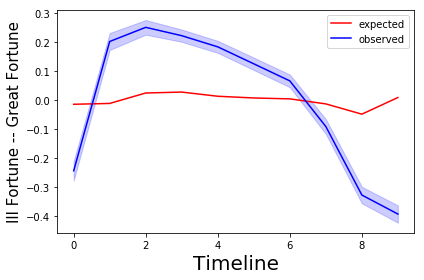

In [478]:
plt.plot(m_r,color='r',label='expected')
plt.plot(m,color='b',label='observed')
plt.fill_between(range(10),np.array(m)-np.array(s),np.array(m)+np.array(s),alpha=0.2,color='b')
plt.ylabel('Ill Fortune -- Great Fortune',size=15)
plt.xlabel('Timeline',size=20)
plt.legend()
plt.tight_layout()
# plt.savefig('./picture/endingmean_100.png',dpi=200)
plt.show()

In [479]:
ttest=[]
for i in range(len(angels)):
    expect=angels_r[i][1]
    observe=angels[i][1]
    ttest.append(ttest_ind(expect,observe).pvalue)

In [480]:
number=0
for i in ttest:
    if i<0.05:
        number+=1

In [481]:
number

924

In [482]:
len(angels)

1109

In [50]:
a=[]
b=[]
for i in range(len(angels)):
    expect=angels[i][1]
    observe=[i[1] for i in angels if i[0]=='Titanic'][0]
    chi=chisquare(expect,observe).pvalue
    if chi>0.99:
        a.append(angels[i][1])
        b.append(angels[i][0])

In [51]:
len(a)

62

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


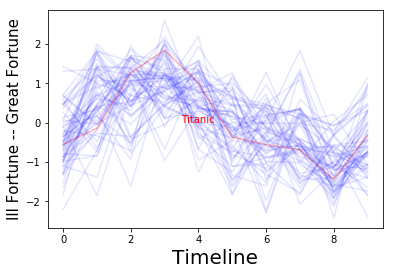

In [69]:
n_split=10
for i in a:
    try:
        exa = np.array(i)
        exa = normalized(exa)
#         exa = savgol_filter(exa, 7, 5)
        plt.plot(range(n_split),exa,color='b',label='smooth',alpha=0.1)
    except:
        pass
exa=normalized([i[1] for i in angels if i[0]=='Titanic'][0])
plt.plot(range(n_split),savgol_filter(exa, 7, 5),color='red',label='smooth',alpha=0.3)
plt.text(3.5,0,'Titanic',color='red')
plt.ylabel('Ill Fortune -- Great Fortune',size=15)
plt.xlabel('Timeline',size=20)
plt.show()

In [53]:
b

['127-Hours',
 'American-Madness',
 'Analyze-That',
 'Batman',
 'Birds,-The',
 'Birthday-Girl',
 'Case-39',
 'Catch-Me-If-You-Can',
 'Catwoman',
 'City-of-Joy',
 'Curious-Case-of-Benjamin-Button,-The',
 'Days-of-Heaven',
 'Double-Indemnity',
 'Elizabeth-The-Golden-Age',
 'Even-Cowgirls-Get-the-Blues',
 'Fatal-Instinct',
 'Fear-and-Loathing-in-Las-Vegas',
 'Flash-Gordon',
 'Frequency',
 'Fright-Night',
 'Green-Mile,-The',
 'Gremlins-2',
 'Haunting,-The',
 'Hellbound-Hellraiser-II',
 'Hellraiser-Hellseeker',
 'High-Fidelity',
 'Hollow-Man',
 'Inception',
 'Interview-with-the-Vampire',
 'Into-the-Woods',
 'Klute',
 'Kramer-vs-Kramer',
 'Leviathan',
 'Lincoln-Lawyer,-The',
 'Lock,-Stock-and-Two-Smoking-Barrels',
 'Man-Trouble',
 'Men-in-Black',
 'Mighty-Morphin-Power-Rangers-The-Movie',
 'Pet-Sematary-II',
 'Phone-Booth',
 'Pineapple-Express',
 'Point-Break',
 'Salton-Sea,-The',
 'Scott-Pilgrim-vs-the-World',
 'Shakespeare-in-Love',
 'Shivers',
 'Spider-Man',
 'State-and-Main',
 'Station-W

In [60]:
movie_type['name1']=movie_type['name'].apply(lambda x: 1 if x in b else 2)

### data collection

extract url from cornell

In [21]:
with open('./cornell movie-dialogs corpus/raw_script_urls.txt','rb') as f:
    data=f.readlines()

In [22]:
url_list=[]
number_list=[]
for d in data:
    try:
        d=str(d, encoding='utf-8')
        url_list.append(d.split('+++$+++ ')[2].split('\n')[0])
        number_list.append(d.split(' +++$+++')[0])
    except:
        print(d)
diction=dict(zip(url_list,number_list))

b'm114 +++$+++ l\xe9on +++$+++ http://www.scifiscripts.com/msol/LEON.txt\n'


extract script from cornell

In [47]:
for k,url in enumerate(url_list[35:]):
    flushPrint(k)
    r=urllib.request.urlopen(url)
    content=r.readlines()
    try:
        filename = 'cornell movie-dialogs corpus/corpora/'+diction[url]+'.txt'
        r = requests.get(url)
        content = BeautifulSoup(r.text, 'lxml')
        content=content.find('body').find('pre')
        content=str(content).replace('<pre>',' ')
        content=str(content).replace('</pre>',' ')
        with open(filename, 'w') as f:
            f.write(content)
    except:
        print(k, url)
        pass

0

URLError: <urlopen error [Errno 61] Connection refused>

In [58]:
url = 'http://www.imsdb.com/all%20scripts/'
r = requests.get(url)
content = BeautifulSoup(r.text, 'lxml')
urls = [i.a['href'] for i in content.find_all('p')]

urls=['%20'.join(url.split(' ')) for url in urls]
urls = ['http://www.imsdb.com'+url for url in urls]

extract genre from imsdb

In [158]:
type_list=["Action","Adventure", "Animation","Comedy","Crime","Drama",
"Family","Fantasy","Film-Noir","Horror","Musical","Mystery",
"Romance","Sci-Fi","Short","Thriller","War","Western"]
genre=[]

for k,url in enumerate(urls[243:]):
    flushPrint(k)
    r = requests.get(url)
    content = BeautifulSoup(r.text, 'lxml')
    content=content.find_all('a')
    gen=[]
    for i in content:
        i=i.get('title')
        try:
            for t in type_list:
                if t in i:
                    gen.append(i.split(' ')[0])   
        except:
            pass
    genre.append(gen)

927

extract script from imsdb

In [ ]:
url = 'http://www.imsdb.com/all%20scripts/'
r = requests.get(url)
content = BeautifulSoup(r.text, 'lxml')
urls = [i.a['href'] for i in content.find_all('p')]

urls = ['http://www.imsdb.com/scripts/'+ url.split('/')[2].replace(' Script', '').replace(' ', '-').replace(':', '') for url in urls]

for k, url in enumerate(urls):
    flushPrint(k)
    r = requests.get(url)
    content = BeautifulSoup(r.text, 'lxml')
    try:
        content = content.find_all('td', {'class', 'scrtext'})[0].text
        filename = 'imsdb/'+url.split('/')[-1].replace('html', 'txt')
        with open(filename, 'w') as f:
            f.write(content)
    except:
        print(k, url)
        pass

extract rating/date from imsdb

In [59]:
inf=[]
for k,url in enumerate(urls[1109]):
    flushPrint(k)
    r = requests.get(url)
    content = BeautifulSoup(r.text, 'lxml')
    try:
        content=content.findAll('table')[12].findAll('td')[2].text
        content=content.split('\n')
        rating1=[]
        rating2=[]
        date1=[]
        date2=[]

        for i in content:
            if 'IMSDb rating'in i:
                rating1.append(i)
            if 'Average user rating' in i:
                rating2.append(i)
            if 'Movie Release Date' in i:
                date1.append(i)
            if 'Script Date' in i:
                date2.append(i)
        inf.append([k+596,rating1,rating2,date1,date2])
    except:
        print(k)
        pass

0

MissingSchema: Invalid URL 'h': No schema supplied. Perhaps you meant http://h?

In [147]:
data=pd.read_csv('1.csv',index_col=0)
data=data.drop(['0'],axis=1)
data.columns=['IMSDb_rating','User_rating','Release_date','Script_date']
data['IMSDb_rating']=data['IMSDb_rating'].apply(lambda x: x.split('(')[1][0] if 'out of' in x
                          else np.nan)
data['User_rating']=data['User_rating'].apply(lambda x: x.split('(')[1][:4] if 'out of' in x
                          else np.nan)
data['Release_date']=data['Release_date'].apply(lambda x: x.split(' ')[5][:4] if 'Movie Release Date' in x
                          else np.nan)
data['Script_date']=data['Script_date'].apply(lambda x: x.split(' ')[4][:4] if 'Script Date' in x
                          else np.nan)

In [157]:
movie_type=pd.read_csv('./movie_type.csv',index_col=0)
movie_type['type']=movie_type['0'].astype('str')+','+movie_type['1'].astype('str')+','+\
movie_type['2'].astype('str')+','+movie_type['3'].astype('str')+','+\
movie_type['4'].astype('str')+','+movie_type['5'].astype('str')+','+movie_type['6'].astype('str')
movie_type['IMSDb_rating']=list(data['IMSDb_rating'])
movie_type['User_rating']=list(data['User_rating'])
movie_type['Release_date']=list(data['Release_date'])
movie_type['Script_date']=list(data['Script_date'])
movie_type=movie_type.drop(['0','1','2','3','4','5','6'],axis=1)
movie_type.to_csv('./movie_type.csv')

In [37]:
male=[]
female=[]
files=glob('./imsdb/*')
for file in files:
    with open(file) as f:
        film_script_list = f.readlines()
    film_script_str = ''.join(film_script_list)
    film_script_wordlist = tknzr.tokenize(film_script_str.lower())
    film_name_list = (set(film_script_wordlist) & set(male_names_list)) |\
                        (set(film_script_wordlist) & set(female_names_list))
    film_script_wordlist_counter = Counter(film_script_wordlist)
    film_name_count_df = pd.DataFrame([[i, film_script_wordlist_counter[i]]for i in film_name_list]\
                                      , columns=['name', 'count'])
    lead = film_name_count_df.sort_values(by='count', ascending=False)['name'].values[0]
    if lead in male_names_list:
        male.append(file.split('/')[2].split('.')[0])
    if lead in female_names_list:
        female.append(file.split('/')[2].split('.')[0])

### genre

In [3]:
movie_type=pd.read_csv('./movie_type.csv',index_col=0)

In [4]:
movie_type.head()

,name,ending,type,IMSDb_rating,User_rating,Release_date,Script_date,gender,ending_10,vec,wordvec,wordvec100,wordvec200,mode,ending_100
0,12-Monkeys,0.0,"Drama,Sci-Fi,Thriller,nan,nan,nan,nan",NaN,9.25,NaN,1994.0,0.0,1.0,"[5.622385321100918, 5.911052631578946, 5.39978...","[11.307730492605003, 10.991469650366682, 10.99...","[8.23082187576179, 12.77271117249029, 12.77271...","[10.024954274955448, 8.23082187576179, 8.23082...",-1.0,0.0
1,12-Years-a-Slave,0.0,"Drama,nan,nan,nan,nan,nan,nan",NaN,NaN,2013.0,NaN,0.0,0.0,"[6.753749999999996, 5.697450980392157, 4.73106...","[13.499752241438784, 13.08735227105251, 13.087...","[14.956624680212244, 14.956624680212244, 14.95...","[14.956624680212244, 14.956624680212244, 14.95...",-2.0,1.0
2,127-Hours,0.0,"Adventure,Drama,Thriller,nan,nan,nan,nan",NaN,NaN,2010.0,NaN,0.0,0.0,"[6.827333333333333, 6.888750000000001, 5.81688...","[0.6101451800952304, 13.08735227105251, -0.659...","[8.088998279314495, 12.77271117249029, 12.7727...","[6.344458756247647, 8.088998279314495, 13.8692...",-1.0,0.0
3,1492-Conquest-of-Paradise,0.0,"Adventure,Drama,nan,nan,nan,nan,nan",NaN,5.00,NaN,1991.0,0.0,0.0,"[6.4945535714285745, 6.647472527472528, 6.9833...","[-1.831013221486387, 12.95863330645571, 12.958...","[14.956624680212244, 14.956624680212244, 14.95...","[14.956624680212244, 14.956624680212244, 14.95...",5.0,1.0
4,15-Minutes,0.0,"Action,Crime,Thriller,nan,nan,nan,nan",NaN,5.75,NaN,NaN,0.0,1.0,"[6.141799999999998, 5.6757647058823535, 5.8467...","[12.95863330645571, 10.991469650366682, 10.991...","[14.956624680212244, 14.956624680212244, 15.79...","[14.956624680212244, 8.23082187576179, 14.9566...",-2.0,0.0


In [5]:
film_type=list(movie_type['type'])
film_type=','.join(film_type)
film_type=film_type.split(',')
film_counter=Counter(film_type)
film_order=sorted(film_counter.items(),key = lambda x:x[1],reverse = True)

In [12]:
film_order

[('nan', 5690),
 ('Drama', 438),
 ('Thriller', 260),
 ('Comedy', 251),
 ('Action', 206),
 ('Romance', 144),
 ('Crime', 142),
 ('Adventure', 118),
 ('Sci-Fi', 113),
 ('Horror', 95),
 ('Mystery', 83),
 ('Fantasy', 74),
 ('Family', 31),
 ('Animation', 26),
 ('Musical', 21),
 ('War', 20),
 ('Western', 11),
 ('Scripts', 10),
 ('Star', 7),
 ('Film-Noir', 3),
 ('Short', 2),
 ('Action.Thriller', 2),
 ('Horror.Mystery', 2),
 ('Addams', 1),
 ('Adventures', 1),
 ('Austin', 1),
 ('Avventura', 1),
 ('', 1),
 ('Chronicles', 1),
 ('King', 1),
 ('Lord', 1),
 ('Mad', 1),
 ('Manhattan', 1),
 ('Rocky', 1),
 ('Three', 1),
 ('True', 1),
 ('Warm', 1),
 ('Warrior', 1)]

In [6]:
a=[i[0] for i in film_order]
b=[i[1] for i in film_order]

In [8]:
len(a)

38

In [9]:
b[1:17]

[438, 260, 251, 206, 144, 142, 118, 113, 95, 83, 74, 31, 26, 21, 20, 11]

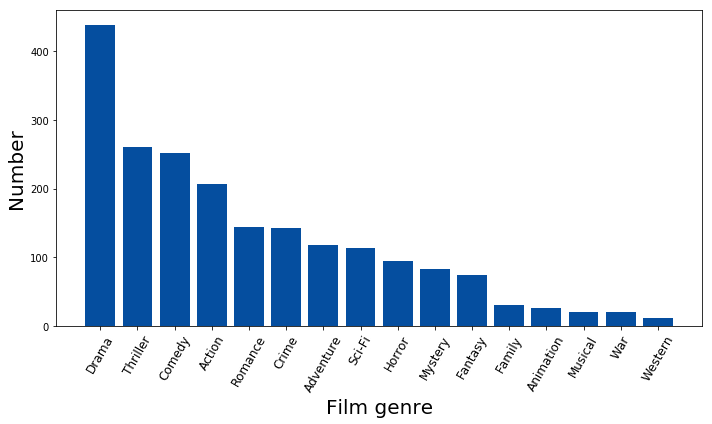

In [10]:
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
plt.bar(range(len),b[1:17],color='#054E9F')
plt.xticks(range(1,17),rotation=60,fontsize=12)
ax.set_xticklabels(a[1:17])
# plt.xticks(rotation=4)
plt.xlabel('Film genre',size=20)
plt.ylabel('Number',size=20)
plt.tight_layout()
plt.savefig('./picture/genre.png',dpi=200)
plt.show()

In [10]:
angels_all=[]
for i in a[1:17]:
    angels=[]
    for j in range(len(movie_type)):
        if i in movie_type['type'][j]:
            angels.append([i,j,eval(movie_type['wordvec100'][j])])
    angels_all.append(angels)

In [16]:
def mean(x):
    x=np.array(x)
#     return(np.mean(x,axis=0),ss.sem(x,axis=0))
    return(np.mean(x,axis=0),np.std(x,axis=0))

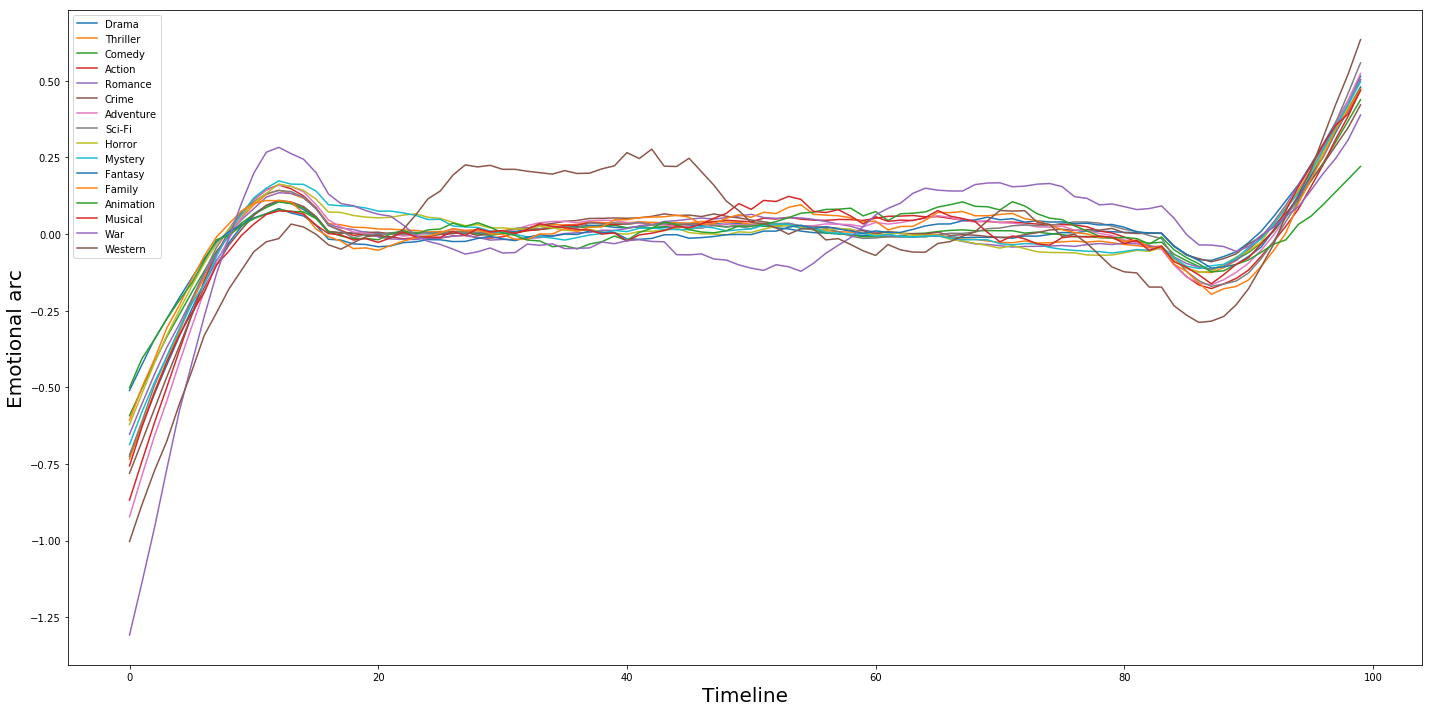

In [17]:
fig=plt.figure(figsize=(20,10))
# cmap = plt.get_cmap('rainbow')
# colors = [cmap(i) for i in np.linspace(0, 1, 6)]
n_split=100
for j in angels_all:# every category
    ang=[]
    for i in j: # every story
        exa = np.array(i[2])
        exa = normalized(exa)
        exa = savitzky_golay(exa, 33, 3)
        p30 = np.poly1d(np.polyfit(range(n_split),exa, 3))
        ang.append(exa)
    m,s=mean(ang)
#     plt.text(50,m[55],i[0],rotation=20,fontsize=10) 
    plt.plot(range(n_split), m, '-',label=i[0])


plt.legend()
plt.xlabel('Timeline',size=20)
plt.ylabel('Emotional arc',size=20)
plt.tight_layout()
plt.savefig('./picture/emotiongenre.png',dpi=200)
plt.show()

In [8]:
film_type=list(movie_type[(movie_type['gender']==0)&(movie_type['ending_100']==0)]['type'])
film_type=','.join(film_type)
film_type=film_type.split(',')
film_counter=Counter(film_type)
sorted(film_counter.items(),key = lambda x:x[1],reverse = True)

[('nan', 3257),
 ('Drama', 248),
 ('Thriller', 145),
 ('Comedy', 135),
 ('Action', 117),
 ('Crime', 89),
 ('Adventure', 71),
 ('Romance', 70),
 ('Sci-Fi', 67),
 ('Mystery', 40),
 ('Horror', 38),
 ('Fantasy', 34),
 ('Family', 16),
 ('War', 15),
 ('Animation', 13),
 ('Western', 11),
 ('Musical', 10),
 ('Scripts', 7),
 ('Star', 5),
 ('Film-Noir', 2),
 ('Action.Thriller', 2),
 ('Horror.Mystery', 2),
 ('Addams', 1),
 ('Adventures', 1),
 ('Austin', 1),
 ('Lord', 1),
 ('Mad', 1),
 ('Rocky', 1),
 ('Three', 1),
 ('True', 1),
 ('Warrior', 1)]

In [9]:
film_type=list(movie_type[(movie_type['gender']==0)&(movie_type['ending_100']==1)]['type'])
film_type=','.join(film_type)
film_type=film_type.split(',')
film_counter=Counter(film_type)
sorted(film_counter.items(),key = lambda x:x[1],reverse = True)

[('nan', 1090),
 ('Drama', 87),
 ('Comedy', 53),
 ('Thriller', 49),
 ('Action', 44),
 ('Crime', 30),
 ('Adventure', 26),
 ('Sci-Fi', 23),
 ('Romance', 21),
 ('Horror', 21),
 ('Fantasy', 20),
 ('Mystery', 18),
 ('Animation', 6),
 ('War', 4),
 ('Musical', 4),
 ('Family', 3),
 ('Star', 2),
 ('Avventura', 1),
 ('', 1),
 ('Scripts', 1),
 ('Manhattan', 1),
 ('Warm', 1)]

In [10]:
film_type=list(movie_type[(movie_type['gender']==1)&(movie_type['ending_100']==1)]['type'])
film_type=','.join(film_type)
film_type=film_type.split(',')
film_counter=Counter(film_type)
sorted(film_counter.items(),key = lambda x:x[1],reverse = True)

[('nan', 272),
 ('Drama', 21),
 ('Action', 14),
 ('Thriller', 14),
 ('Comedy', 14),
 ('Horror', 10),
 ('Sci-Fi', 8),
 ('Romance', 7),
 ('Crime', 6),
 ('Fantasy', 6),
 ('Family', 5),
 ('Musical', 4),
 ('Mystery', 4),
 ('Animation', 3),
 ('Adventure', 3),
 ('Chronicles', 1)]

In [12]:
film_type=list(movie_type[(movie_type['gender']==1)&(movie_type['ending_100']==0)]['type'])
film_type=','.join(film_type)
film_type=film_type.split(',')
film_counter=Counter(film_type)
sorted(film_counter.items(),key = lambda x:x[1],reverse = True)

[('nan', 1071),
 ('Drama', 82),
 ('Thriller', 52),
 ('Comedy', 49),
 ('Romance', 46),
 ('Action', 31),
 ('Horror', 26),
 ('Mystery', 21),
 ('Adventure', 18),
 ('Crime', 17),
 ('Sci-Fi', 15),
 ('Fantasy', 14),
 ('Family', 7),
 ('Animation', 4),
 ('Musical', 3),
 ('Scripts', 2),
 ('Short', 2),
 ('King', 1),
 ('War', 1),
 ('Film-Noir', 1)]

### validation

#### case

In [27]:
def wordavg(script,words):
    try:
        wordlist=list(words['word'])
        common=[w for w in wordlist if w in script]
        df=words.loc[words['word'].isin(common)]

        diction=Counter(scriptlist)

        df['freq']=df['word'].apply(lambda x:diction[x] if x in diction
                                   else np.nan)
#         df=df[(df['happiness_average']>7) |(df['happiness_average']<3)]

        avg=sum(df['happiness_average']*df['freq'])/sum(df['freq'])
    except:
        avg=4.5
    return avg

In [9]:
words=pd.read_csv('./words.csv')

In [16]:
with open('/Users/xuhuimin/storytelling/imsdb/Shawshank-Redemption,-The.txt') as f:
# with open('/Users/xuhuimin/storytelling/imsdb/Titanic.txt') as f:
    film_script_list = f.readlines()
film_script_str = ''.join(film_script_list)

tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus = [i for i in corpus if i != []]

In [17]:
n_split = 100
corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


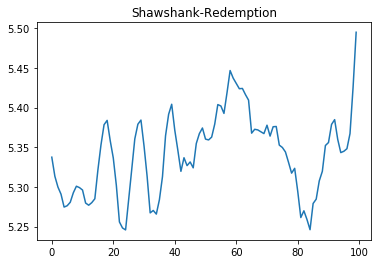

In [20]:
avglist=[]
for n in range(n_split):
    scriptlist=[]
    for i in range(len(corpus[n])):
        scriptlist.extend(corpus[n][i])
    avglist.append(wordavg(scriptlist,words))
    
exa = np.array(avglist)
exa = savitzky_golay(exa, 11, 3) # window size 51, polynomial order 3
p30 = np.poly1d(np.polyfit(range(len(avglist)),exa, 3))
plt.title('Shawshank-Redemption')
plt.plot(range(len(avglist)),exa,label='smooth')

# plt.plot(avglist)

#### visulization

In [39]:
files=glob('./imsdb/*')
alllist=[]
for file in files:
    with open(file) as f:
        film_script_list = f.readlines()
    try:
        film_script_str = ''.join(film_script_list)

        tknzr = WordPunctTokenizer()
        corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
        corpus = [i for i in corpus if i != []]
        n_split = 10
        corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]
        avglist=[]
        for n in range(n_split):
            scriptlist=[]
            for i in range(len(corpus[n])):
                scriptlist.extend(corpus[n][i])
            avglist.append(wordavg(scriptlist,words))
        alllist.append([file,avglist])
    except Exception as e:
        print(e)
        print(file, 'wrong')
        pass

In [59]:
name=[i[0].split('/')[-1].split('.')[0] for i in alllist]

vec=[i[1] for i in alllist]

diction=dict(zip(name,vec))

movie_type=pd.read_csv('./movie_type.csv',index_col=0)
movie_type['vec']=movie_type['name'].apply(lambda x: diction[x] if x in diction
                                          else np.nan)

In [61]:
movie_type.to_csv('movie_type.csv',index=False)

In [251]:
movie_type=pd.read_csv('./movie_type.csv')

In [293]:
pears=[]
for i in range(len(movie_type)):
    try:
        a=eval(movie_type['vec'][i])
#         a=normalize(a)
        a=normalize(savitzky_golay(np.array(a),11,3))
        b=eval(movie_type['wordvec'][i])
#         b=normalize(b)
        b=normalize(savitzky_golay(np.array(b),11,3))
        pears.append(np.corrcoef(a, b)[0, 1])
    except:
        pass

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


In [290]:
len(pears)

1114

In [281]:
pears=[x for x in pears if str(x) != 'nan']

In [282]:
np.mean(pears)

0.16644517583313448

In [287]:
correct=[x for x in pears if x >0]

In [288]:
len(correct)

640

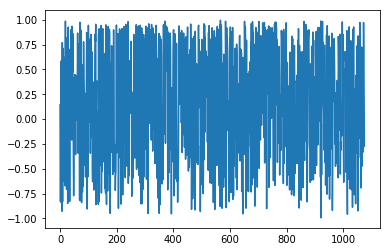

In [285]:
plt.plot(pears)

In [315]:
a=eval(movie_type['vec'][2])

In [316]:
a

[6.3326605504587175,
 5.64264957264957,
 5.864414414414413,
 6.00070796460177,
 6.313518518518516,
 5.9696453900709185,
 6.165098039215684,
 6.332871287128712,
 5.654509803921569,
 5.357209302325581]

In [317]:
a.index(max(a))+1

8

In [312]:
b=eval(movie_type['wordvec'][1])

In [313]:
b

[12.95863330645571,
 12.95863330645571,
 12.95863330645571,
 18.857275529223188,
 9.783994094305996,
 12.95863330645571,
 12.95863330645571,
 12.95863330645571,
 18.857275529223188,
 18.857275529223188]

In [314]:
b.index(max(b))+1

4

### SVD

#### case

In [23]:
# I like deep learning. 

# I like NLP.

# I enjoy flying.

In [91]:
import numpy as np
import matplotlib.pyplot as plt
 
la = np.linalg
words = ["I","like","enjoy","deep","learning","NLP","flying","."]
 
X=np.array([[0,2,1,0,0,0,0,0],[2,0,0,1,0,1,0,0],[1,0,0,0,0,0,1,0],[0,1,0,0,1,0,0,0],[0,0,0,1,0,0,0,1],[0,1,0,0,0,0,0,1],[0,0,1,0,0,0,0,1],[0,0,0,0,1,1,1,0]])
 
W,sigma,CT=la.svd(X,full_matrices=False)


In [27]:
X.shape

(8, 8)

In [28]:
W.shape

(8, 8)

In [18]:
sigma

array([2.75726275, 2.678248  , 1.89221277, 1.61803399, 1.19154564,
       0.94833983, 0.61803399, 0.56999221])

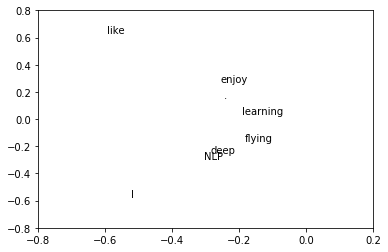

In [20]:
plt.axis([-0.8,0.2,-0.8,0.8])
 
for i in range(len(words)):
    plt.text(W[i,0],W[i,1],words[i])
plt.show()

#### application

In [414]:
movie_type=pd.read_csv('./movie_type.csv')

In [228]:
# for i in range(len(movie_type)):
#     try:
#         movie_type['wordvec100'][i]=eval(movie_type['wordvec100'].values[i])
#     except:
#         pass

In [415]:
movie_type=movie_type[movie_type['wordvec10'].astype(str)!='nan']

In [416]:
movie_type['wordvec10']=movie_type['wordvec10'].apply(lambda x: eval(x))

In [417]:
movie_type['wordvec10']=movie_type['wordvec10'].apply(lambda x: savitzky_golay(np.array(x), 11, 3))

In [418]:
len(movie_type)

1109

In [419]:
movie_type=movie_type[['name','wordvec10','gender']]

In [420]:
q=movie_type.values

In [421]:
big_matrix=np.ones([len(q),10])

In [422]:
for i,b in enumerate(q):
    big_matrix[i,:]=b[-2]

In [423]:
big_matrix.shape

(1109, 10)

In [424]:
big_matrix_mean0 = big_matrix-np.tile(big_matrix.mean(axis=1),(10,1)).transpose() #relative happiness

In [212]:
# big_matrix_mean0 = (big_matrix-big_matrix.mean(axis=0))/ big_matrix.std(axis=0)

Text(0.5, 0, 'components')

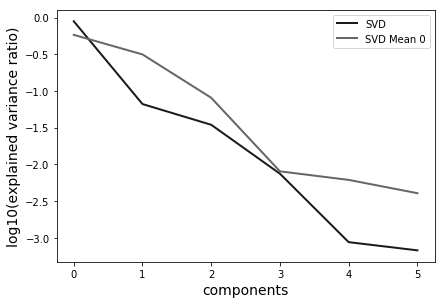

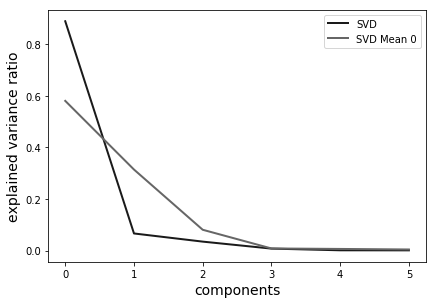

In [425]:
# pca = PCA(n_components='mle')
svd = TruncatedSVD(n_components=6,algorithm='arpack')
svd.fit(big_matrix)
# svd.n_components_

fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(np.log10(svd.explained_variance_ratio_),linewidth=2,color=".1")


# pca = PCA(n_components='mle')
svd2 = TruncatedSVD(n_components=6,algorithm='arpack')
svd2.fit(big_matrix_mean0)
# svd.n_components_

ax1.plot(np.log10(svd2.explained_variance_ratio_),linewidth=2,color=".4")
ax1.legend(['SVD','SVD Mean 0'])
ax1.set_ylabel('log10(explained variance ratio)',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig("SVD-variance.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(svd.explained_variance_ratio_,linewidth=2,color=".1")
ax1.plot(svd2.explained_variance_ratio_,linewidth=2,color=".4")
ax1.legend(['SVD','SVD Mean 0'])
ax1.set_ylabel('explained variance ratio',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig('svd-{0}components-30-50-explainedvariance-both.svg'.format(12))
# mysavefig('svd-{0}components-30-50-explainedvariance-both.png'.format(12))
# mysavefig("SVD-log10variance.pdf",folder="media/figures/SVD",openfig=False)

In [426]:
print(np.cumsum(svd.explained_variance_ratio_))
print(np.cumsum(svd2.explained_variance_ratio_))

[0.88919527 0.95533914 0.98984726 0.99728216 0.99814981 0.99882071]
[0.5803614  0.89440571 0.97490064 0.98290661 0.98902816 0.99306247]


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'SVD Components for 1109 films, unweighted\n')

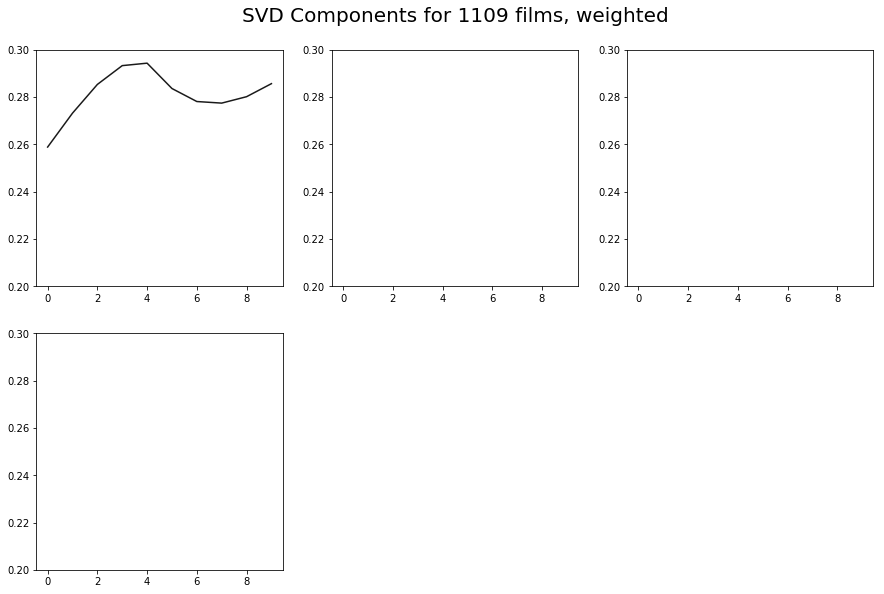

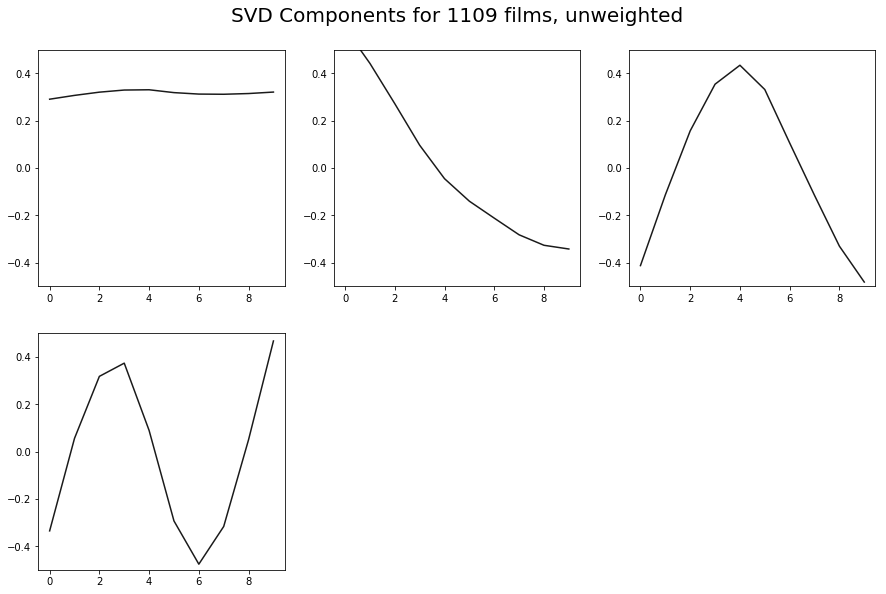

In [440]:
fig = plt.figure(figsize=(15,20))
for i in range(4):
    plt.subplot(4,3,i+1)
    plt.plot(svd.components_[i]*svd.explained_variance_ratio_[i],color=".1",linewidth=1.5)
    plt.ylim([0.2,0.3])
plt.subplot(4,3,2)
plt.title("SVD Components for {} films, weighted\n".format(len(q)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
# mysavefig("SVD-timeseries-weighted.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(15,20))
for i in range(4):
    plt.subplot(4,3,i+1)
    plt.plot(svd.components_[i],color=".1",linewidth=1.5)
    plt.ylim([-0.5,0.5])
plt.subplot(4,3,2)
plt.title("SVD Components for {} films, unweighted\n".format(len(q)),fontsize=20)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'SVD Mean 0 Components for 1109 books, unweighted')

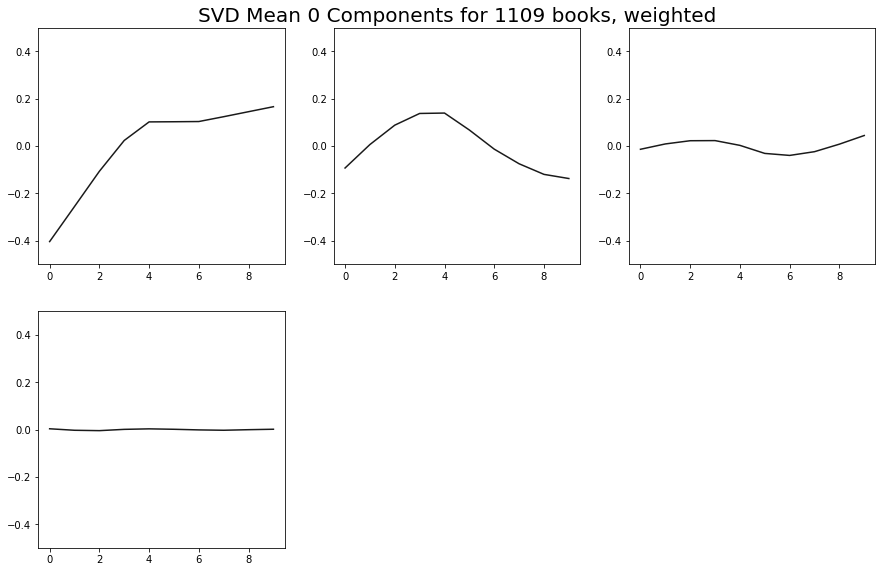

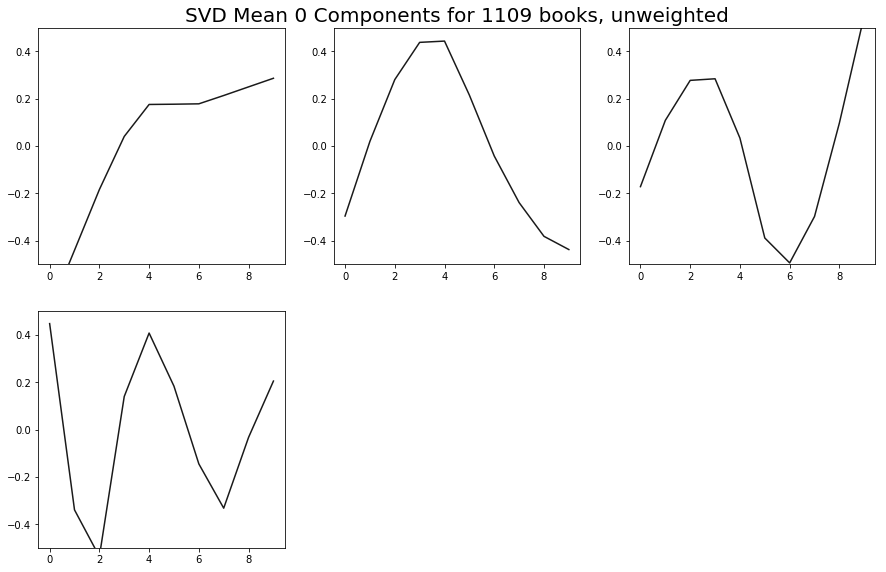

In [428]:
fig = plt.figure(figsize=(15,20))
for i in range(4):
    plt.subplot(4,3,i+1)
    plt.plot(svd2.components_[i]*svd2.explained_variance_ratio_[i],color=".1",linewidth=1.5)
    plt.ylim([-.5,.5])
plt.subplot(4,3,2)
plt.title("SVD Mean 0 Components for {} books, weighted".format(len(q)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
# mysavefig("SVD-timeseries-weighted-mean0.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(15,20))
for i in range(4):
    plt.subplot(4,3,i+1)
    plt.plot(svd2.components_[i],color=".1",linewidth=1.5)
    plt.ylim([-.5,.5])
plt.subplot(4,3,2)
plt.title("SVD Mean 0 Components for {} books, unweighted".format(len(q)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
# mysavefig("SVD-timeseries-unweighted-mean0.pdf",folder="media/figures/SVD",openfig=False)

In [429]:
U,S,V = np.linalg.svd(big_matrix_mean0,full_matrices=True,compute_uv=True)

Text(0.5, 0, 'components')

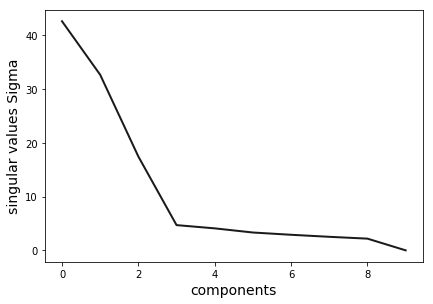

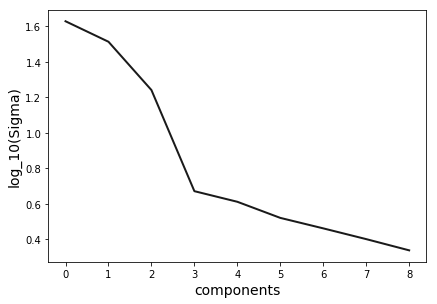

In [430]:
fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(S,linewidth=2,color=".1")
ax1.set_ylabel('singular values Sigma',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig('pca-{0}components-explainedvariance-mean0.png'.format(pca.n_components_))
# mysavefig("SVD-variance-numpy.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(np.log10(S[:-1]),color=".1",linewidth=2)
ax1.set_ylabel('log_10(Sigma)',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig('pca-{0}components-explainedvariance-mean0.png'.format(pca.n_components_))
# mysavefig("SVD-log10variance-numpy.pdf",folder="media/figures/SVD",openfig=False)

In [431]:
print(U.shape)
print(S.shape)
print(V.shape)

(1109, 1109)
(10,)
(10, 10)


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'SVD Mean 0 Components for 1109 books, weighted\n')

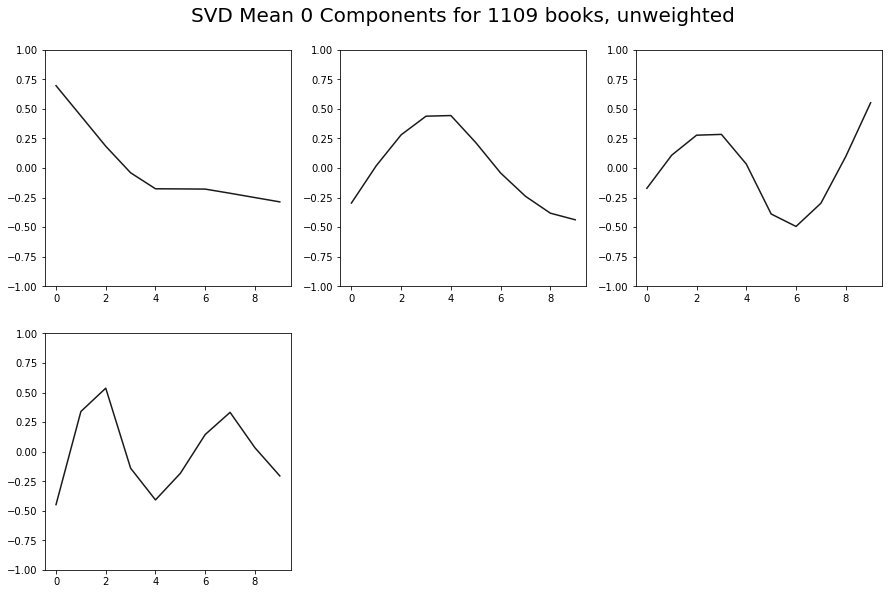

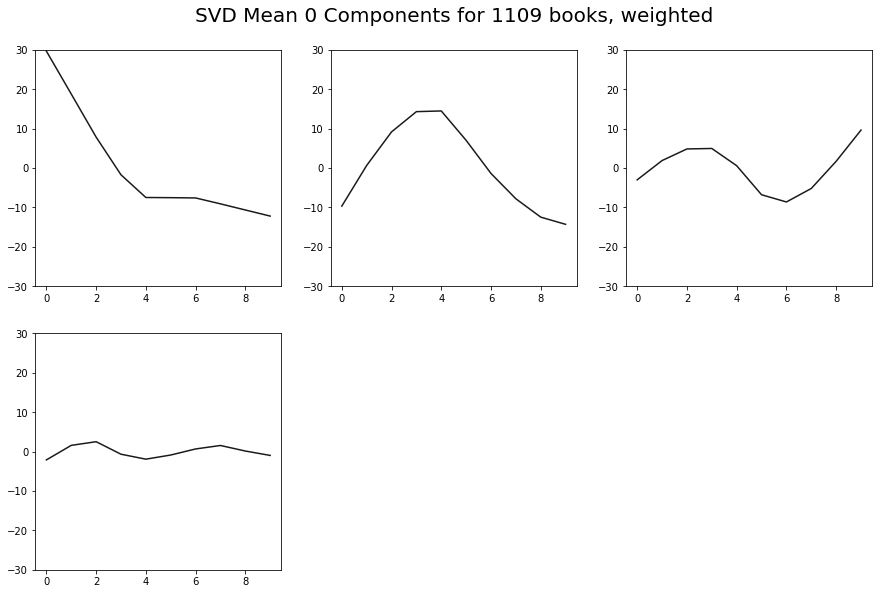

In [432]:
fig = plt.figure(figsize=(15,20))
for i in range(4):
    plt.subplot(4,3,i+1)
    plt.plot(V[i,:],color=".1",linewidth=1.5)
    plt.ylim([-1,1])
plt.subplot(4,3,2)
plt.title("SVD Mean 0 Components for {} books, unweighted\n".format(len(q)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
# mysavefig("SVD-timeseries-unweighted-mean0-numpy.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(15,20))
for i in range(4):
    plt.subplot(4,3,i+1)
    plt.plot(V[i,:]*S[i],color=".1",linewidth=1.5)
    plt.ylim([-30,30])
plt.subplot(4,3,2)
plt.title("SVD Mean 0 Components for {} books, weighted\n".format(len(q)),fontsize=20)
# mysavefig("SVD-timeseries-weighted-mean0-numpy.pdf",folder="media/figures/SVD",openfig=False)

In [433]:
w = U[:,:10]*S
print(w.shape)

(1109, 10)


In [434]:
w_abs = np.abs(w)
w_normalized = np.multiply(w,np.tile(1./w_abs.sum(axis=1),(10,1)).transpose())

In [435]:
num_modes = 10
all_lists = [{} for i in range(num_modes)]
for m in range(num_modes):
    all_lists[m]["top_abs"] = sorted(zip(q,w[:,m],range(len(q))),key=lambda x: np.abs(x[1]),reverse=True)
    all_lists[m]["top_pos"] = sorted(zip(q,w[:,m],range(len(q))),key=lambda x: -x[1])
    all_lists[m]["top_neg"] = sorted(zip(q,w[:,m],range(len(q))),key=lambda x: x[1])
    all_lists[m]["top_abs_norm"] = sorted(zip(q,w_normalized[:,m],range(len(q))),key=lambda x: np.abs(x[1]),reverse=True)
    all_lists[m]["top_pos_norm"] = sorted(zip(q,w_normalized[:,m],range(len(q))),key=lambda x: -x[1])
    all_lists[m]["top_neg_norm"] = sorted(zip(q,w_normalized[:,m],range(len(q))),key=lambda x: x[1])

In [436]:
def plot_svs(svstart,v=True,fix_ylim=0.0,xspacing=.01):
    nsvs = 3
    xoffset = .1
    xwidth = (1.-xoffset)/(nsvs)-xspacing
    print('xwidth is {0}'.format(xwidth))
    
    chars = 60
    
    fig = plt.figure(figsize=(15,12))
    for sv in range(0,2):
        print(sv)
        # ind = np.argsort(w[:,sv+svstart])[-20:]
        ax1rect = [xoffset+sv*(xspacing+xwidth),.6,xwidth,.35]
        ax1 = fig.add_axes(ax1rect)
        ax1books = fig.add_axes([xoffset+sv*(xspacing+xwidth),.5,xwidth,.1])
        # ax1books.text?
        # ax.set_title('20 closest positive correlates')
        if v:
            print('-'*80)
            print('20 closest positive correlates:')
        j=0
        for b,s,i in all_lists[sv+svstart]["top_pos_norm"][:15]:
            ax1.plot(-big_matrix_mean0[i]/np.sum(np.abs(w[i,:]))/s,color=".4",label=None)
            # plt.plot(big_matrix_mean0[i],color=".4")
            if v:
                print(s,b[0])
            if j<3:
                if len(b[0]) > chars:
                    ax1books.text(0.0,0.5-j*.2,'{0}: {1}...'.format(j+1,b[0][:chars-3].replace("\n",": ")),fontsize=10)
                else:
                    ax1books.text(0.0,0.5-j*.2,'{0}: {1}'.format(j+1,b[0].replace("\n",": ")),fontsize=10)
            j+=1
        ax1.plot(-V[sv+svstart,:],color="#ff6700",linewidth=2,label="SV {}".format(sv+svstart+1))
#         ax1.set_xticks([10,20,30,40,50,60,70,80,90])
#         ax1.set_xticklabels(["10","20","30","40","50","60","70","80","90"])
#         ax1.text(.98,0.02,r"% of Book",ha="right",va="bottom",transform=ax1.transAxes)
        ax1.legend(loc="upper left")
    
        
        
        #ax1.axis('off')
        ax1books.axis('off')

        ax2 = fig.add_axes([xoffset+sv*(xspacing+xwidth),.1,xwidth,.35])
        ax2books = fig.add_axes([xoffset+sv*(xspacing+xwidth),.0,xwidth,.1])
        # ax2.set_title('20 closest negative correlates')
        if v:
            print('-'*80)
            print('20 closest negative correlates:')
        j=0
        for b,s,i in all_lists[sv+svstart]["top_neg_norm"][:15]:
            ax2.plot(big_matrix_mean0[i]/np.sum(np.abs(w[i,:]))/s,color=".4",label=None)
            # plt.plot(big_matrix_mean0[i],color=".4")
            if v:
                print(s,b[0])
            if j<3:
                if len(b[0]) > chars:
                    ax2books.text(0.0,.5-j*.2,'{0}: {1}...'.format(j+1,b[0][:chars-3].replace("\n",": ")),fontsize=10)
                else:
                    ax2books.text(0.0,.5-j*.2,'{0}: {1}'.format(j+1,b[0].replace("\n",": ")),fontsize=10)
            j+=1
        ax2.plot(V[sv+svstart,:],color="#ff6700",linewidth=2,label="(SV {})".format(sv+svstart+4))
#         ax2.set_xticks([10,20,30,40,50,60,70,80,90])
#         ax2.set_xticklabels(["10","20","30","40","50","60","70","80","90"])
#         ax2.text(.98,0.02,r"% of Book",ha="right",va="bottom",transform=ax1.transAxes)
        ax2.legend(loc="upper left")

        #ax1.axis('off')
        ax2books.axis('off')
        if fix_ylim > 0:
            ax1.set_ylim([-fix_ylim,fix_ylim])
            ax2.set_ylim([-fix_ylim,fix_ylim])
        if sv > 0:
            ax1.set_yticklabels([])
            ax2.set_yticklabels([])

    
    plt.savefig('./picture/mode.png',dpi=200)

        
        


xwidth is 0.29
0
1


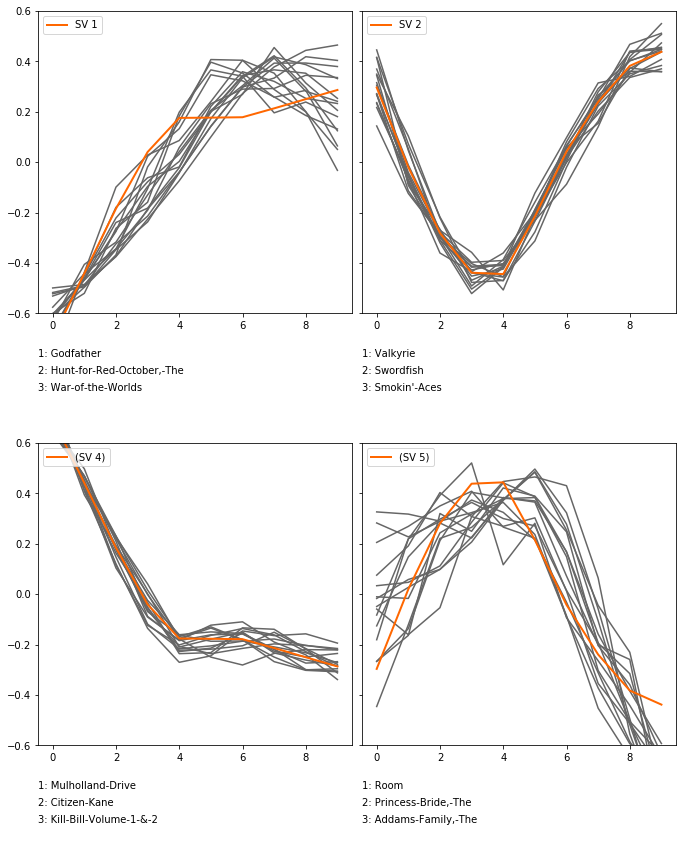

In [437]:
plot_svs(0,v=False,fix_ylim=0.6)

xwidth is 0.29
0
1


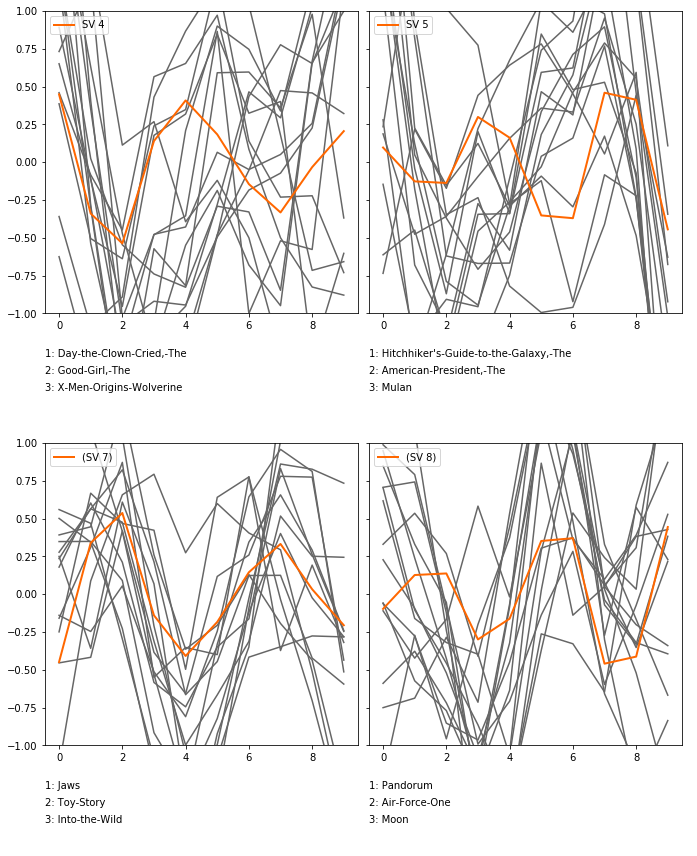

In [438]:
plot_svs(3,v=False,fix_ylim=1)

In [285]:
core_emotional_arcs = [sorted(zip(w_normalized[i,:],
                                  range(1,len(w_normalized[i,:])+1)),
                              key=lambda x: np.abs(x[0]),
                              reverse=True) for i,b in enumerate(q)]

all_downloads = [b[2] for b in q]

In [286]:
# split onto the positive and negative of each mode
pos_stories = [[] for i in range(len(core_emotional_arcs[0]))]
neg_stories = [[] for i in range(len(core_emotional_arcs[0]))]

for i in range(len(core_emotional_arcs)):
    if core_emotional_arcs[i][0][0] > 0:
        pos_stories[core_emotional_arcs[i][0][1]-1].append(i)
    else:
        neg_stories[core_emotional_arcs[i][0][1]-1].append(i)
print(pos_stories[0][:10])
print(neg_stories[0][:10])

[192, 198, 401, 519, 606, 664, 754, 810]
[0, 2, 7, 9, 12, 13, 16, 18, 21, 26]


In [287]:
def core_stats(book_indices):
    N = len(book_indices)
    percentage = N/len(q)*100
    these_downloads = [q[i][2] for i in book_indices]
    percentage_more = np.sum(these_downloads>np.mean(all_downloads))/len(these_downloads)*100
    return N,percentage,np.mean(these_downloads),np.median(these_downloads),these_downloads,np.var(these_downloads),percentage_more
def find_bin_i(bins,x):
    j = 0
    while bins[j] < x:
        j+=1
    return j-1

In [289]:
for i in range(15):
    stats = core_stats(pos_stories[i])
    print("SV {}".format(i+1),stats[:4])
#     print(pos_stories[i])
    fig = plt.figure(figsize=(6,.55))
    ax = fig.add_axes([0,0,1,1])
    # ax.set_xlim([100,1000])
    # ax.hist(stats[4],bins=np.arange(100,20000,100),color=".5")
    # ax.hist(stats[4],color=".5")
    a = ax.hist(np.log10(stats[4]),bins=np.arange(2.0,4.5,.07),color=".5")
    ax.plot([2.0,4.5],[0.0,0.0],linewidth=0.5,color=".7")
    ax.set_xlim([2.0,4.5])
    y_range = ax.get_ylim()[1]
    ax.plot(np.log10(stats[3]),a[0][find_bin_i(a[1],np.log10(stats[3]))]+y_range*.17,'kv',markersize=13)
    ax.plot(np.log10(stats[2]),a[0][find_bin_i(a[1],np.log10(stats[2]))]+y_range*.17,'kv',markersize=13,fillstyle='none')
    # ax.set_xlim([100,20000])
    ax.axis("off")
#     mysavefig("SV{0}-+-sparkhist.pdf".format(i+1),folder=this_dir,date=False,openfig=False,pdfcrop=True)
    plt.close(fig)
    fig = plt.figure(figsize=(1.5,.55))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(np.arange(0,100),V[i,:],color="#ff6700",linewidth=2)
    ax.axis("off")
#     mysavefig("SV{0}-+-spark.pdf".format(i+1),folder=this_dir,date=False,openfig=False,pdfcrop=True)
    plt.close(fig)
    stats = core_stats(neg_stories[i])
    print("-SV {}".format(i+1),stats[:4])
#     print(neg_stories[i])
    fig = plt.figure(figsize=(6,.55))
    ax = fig.add_axes([0,0,1,1])
    a = ax.hist(np.log10(stats[4]),bins=np.arange(2.0,4.5,.07),color=".5")
    ax.plot([2.0,4.5],[0.0,0.0],linewidth=0.5,color=".7")
    ax.set_xlim([2.0,4.5])
    y_range = ax.get_ylim()[1]
    ax.plot(np.log10(stats[3]),a[0][find_bin_i(a[1],np.log10(stats[3]))]+y_range*.17,'kv',markersize=13)
    ax.plot(np.log10(stats[2]),a[0][find_bin_i(a[1],np.log10(stats[2]))]+y_range*.17,'kv',markersize=13,fillstyle='none')
    ax.axis("off")
#     mysavefig("SV{0}---sparkhist.pdf".format(i+1),folder=this_dir,date=False,openfig=False,pdfcrop=True)
    plt.close(fig)
    fig = plt.figure(figsize=(1.5,.55))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(np.arange(0,100),-V[i,:],color="#ff6700",linewidth=2)
    ax.axis("off")
#     mysavefig("SV{0}---spark.pdf".format(i+1),folder=this_dir,date=False,openfig=False,pdfcrop=True)
    plt.close(fig)

SV 1 (8, 0.7213706041478809, 0.25, 0.0)
-SV 1 (390, 35.166816952209196, 0.2230769230769231, 0.0)


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10


SV 2 (44, 3.967538322813345, 0.20454545454545456, 0.0)
-SV 2 (146, 13.165013525698827, 0.2671232876712329, 0.0)
SV 3 (86, 7.75473399458972, 0.2441860465116279, 0.0)
-SV 3 (56, 5.049594229035167, 0.2857142857142857, 0.0)
SV 4 (91, 8.205590622182147, 0.25274725274725274, 0.0)
-SV 4 (48, 4.328223624887286, 0.25, 0.0)
SV 5 (67, 6.0414788097385035, 0.2537313432835821, 0.0)
-SV 5 (32, 2.8854824165915236, 0.28125, 0.0)
SV 6 (37, 3.3363390441839496, 0.13513513513513514, 0.0)
-SV 6 (36, 3.2461677186654643, 0.2222222222222222, 0.0)
SV 7 (41, 3.69702434625789, 0.2682926829268293, 0.0)
-SV 7 (10, 0.9017132551848512, 0.2, 0.0)
SV 8 (11, 0.9918845807033363, 0.2727272727272727, 0.0)
-SV 8 (5, 0.4508566275924256, 0.0, 0.0)
SV 9 

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages

(1, 0.09017132551848511, 1.0, 1.0)
-SV 9 (0, 0.0, nan, nan)
SV 10 (0, 0.0, nan, nan)
-SV 10 (0, 0.0, nan, nan)
SV 11 (0, 0.0, nan, nan)
-SV 11 (0, 0.0, nan, nan)
SV 12 (0, 0.0, nan, nan)
-SV 12 (0, 0.0, nan, nan)
SV 13 (0, 0.0, nan, nan)
-SV 13 (0, 0.0, nan, nan)
SV 14 (0, 0.0, nan, nan)
-SV 14 (0, 0.0, nan, nan)
SV 15 (0, 0.0, nan, nan)
-SV 15 (0, 0.0, nan, nan)


In [198]:
for i in range(15):
    stats = core_stats(pos_stories[i])
    print("SV {}".format(i+1),stats[:4])
#     print(pos_stories[i])
    fig = plt.figure(figsize=(6,.55))
    ax = fig.add_axes([0,0,1,1])
    # ax.set_xlim([100,1000])
    # ax.hist(stats[4],bins=np.arange(100,20000,100),color=".5")
    # ax.hist(stats[4],color=".5")
    a = ax.hist(np.log10(stats[4]),bins=np.arange(2.0,4.5,.07),color=".5")
    ax.plot([2.0,4.5],[0.0,0.0],linewidth=0.5,color=".7")
    ax.set_xlim([2.0,4.5])
    y_range = ax.get_ylim()[1]
    ax.plot(np.log10(stats[3]),a[0][find_bin_i(a[1],np.log10(stats[3]))]+y_range*.17,'kv',markersize=13)
    ax.plot(np.log10(stats[2]),a[0][find_bin_i(a[1],np.log10(stats[2]))]+y_range*.17,'kv',markersize=13,fillstyle='none')
    # ax.set_xlim([100,20000])
    ax.axis("off")
#     mysavefig("SV{0}-+-sparkhist.pdf".format(i+1),folder=this_dir,date=False,openfig=False,pdfcrop=True)
    plt.close(fig)
    fig = plt.figure(figsize=(1.5,.55))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(np.arange(0,100,0.5),V[i,:],color="#ff6700",linewidth=2)
    ax.axis("off")
#     mysavefig("SV{0}-+-spark.pdf".format(i+1),folder=this_dir,date=False,openfig=False,pdfcrop=True)
    plt.close(fig)
    stats = core_stats(neg_stories[i])
    print("-SV {}".format(i+1),stats[:4])
#     print(neg_stories[i])
    fig = plt.figure(figsize=(6,.55))
    ax = fig.add_axes([0,0,1,1])
    a = ax.hist(np.log10(stats[4]),bins=np.arange(2.0,4.5,.07),color=".5")
    ax.plot([2.0,4.5],[0.0,0.0],linewidth=0.5,color=".7")
    ax.set_xlim([2.0,4.5])
    y_range = ax.get_ylim()[1]
    ax.plot(np.log10(stats[3]),a[0][find_bin_i(a[1],np.log10(stats[3]))]+y_range*.17,'kv',markersize=13)
    ax.plot(np.log10(stats[2]),a[0][find_bin_i(a[1],np.log10(stats[2]))]+y_range*.17,'kv',markersize=13,fillstyle='none')
    ax.axis("off")
#     mysavefig("SV{0}---sparkhist.pdf".format(i+1),folder=this_dir,date=False,openfig=False,pdfcrop=True)
    plt.close(fig)
    fig = plt.figure(figsize=(1.5,.55))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(np.arange(0,100,0.5),-V[i,:],color="#ff6700",linewidth=2)
    ax.axis("off")
#     mysavefig("SV{0}---spark.pdf".format(i+1),folder=this_dir,date=False,openfig=False,pdfcrop=True)
    plt.close(fig)

SV 1 (360, 32.46167718665464, 0.2638888888888889, 0.0)
-SV 1 (266, 23.98557258791704, 0.21052631578947367, 0.0)


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10


SV 2 (33, 2.9756537421100093, 0.24242424242424243, 0.0)
-SV 2 (30, 2.7051397655545535, 0.2, 0.0)
SV 3 (21, 1.8935978358881875, 0.2857142857142857, 0.0)
-SV 3 (25, 2.254283137962128, 0.16, 0.0)
SV 4 (26, 2.3444544634806133, 0.23076923076923078, 0.0)
-SV 4 (30, 2.7051397655545535, 0.23333333333333334, 0.0)
SV 5 (29, 2.6149684400360687, 0.13793103448275862, 0.0)
-SV 5 (28, 2.5247971145175834, 0.14285714285714285, 0.0)
SV 6 (27, 2.4346257889990985, 0.2962962962962963, 0.0)
-SV 6 (24, 2.164111812443643, 0.3333333333333333, 0.0)
SV 7 (17, 1.532912533814247, 0.29411764705882354, 0.0)
-SV 7 (23, 2.0739404869251574, 0.13043478260869565, 0.0)
SV 8 (20, 1.8034265103697025, 0.1, 0.0)
-SV 8 (16, 1.4427412082957618, 0.1875, 0.0)
SV 9 (23, 2.0739404869251574, 0.30434782608695654, 0.0)
-SV 9 (17, 1.532912533814247, 0.17647058823529413, 0.0)
SV 10 (15, 1.3525698827772767, 0.4, 0.0)
-SV 10 (17, 1.532912533814247, 0.17647058823529413, 0.0)
SV 11 (8, 0.7213706041478809, 0.125, 0.0)
-SV 11 (11, 0.991884580

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


(9, 0.8115419296663661, 0.4444444444444444, 0.0)
-SV 13 (4, 0.36068530207394045, 0.0, 0.0)
SV 14 (5, 0.4508566275924256, 0.0, 0.0)
-SV 14 (4, 0.36068530207394045, 0.75, 1.0)
SV 15 (2, 0.18034265103697023, 0.5, 0.5)
-SV 15 (3, 0.2705139765554554, 0.6666666666666666, 1.0)


In [427]:
for m in range(15):
    name=[]
    for i in pos_stories[m]:
        name.append(q[i][0])

    mode_df=movie_type.loc[movie_type['name'].isin(name)].index
    movie_type.ix[mode_df,'mode']=m+1
    
    name=[]
    for i in neg_stories[m]:
        name.append(q[i][0])

    mode_df=movie_type.loc[movie_type['name'].isin(name)].index
    movie_type.ix[mode_df,'mode']=-(m+1)  
    

In [430]:
diction=dict(movie_type[['name','mode']].values)

In [431]:
movie_type=pd.read_csv('./movie_type.csv')

In [433]:
movie_type['mode']=movie_type['name'].apply(lambda x: diction[x] if x in diction
                                   else np.nan)

In [436]:
movie_type.to_csv('./movie_type.csv',index=False)

In [20]:
movie_type=pd.read_csv('./movie_type.csv')

In [21]:
movie_type.describe()

,ending,IMSDb_rating,User_rating,Release_date,Script_date,gender,ending_10,mode
count,1109.000000,88.000000,759.000000,590.000000,640.000000,1109.000000,1109.000000,1109.000000
mean,0.073940,7.079545,8.453202,2001.344068,1996.631250,0.238954,0.402164,-0.779080
std,0.261792,1.627505,1.637484,15.948940,11.980486,0.426637,0.490556,3.748029
min,0.000000,1.000000,1.000000,1929.000000,1935.000000,0.000000,0.000000,-10.000000
25%,0.000000,6.000000,7.750000,1999.000000,1992.000000,0.000000,0.000000,-2.000000
50%,0.000000,7.000000,9.000000,2007.000000,1998.000000,0.000000,0.000000,-1.000000
75%,0.000000,8.000000,9.710000,2010.000000,2006.000000,0.000000,1.000000,-1.000000
max,1.000000,9.000000,10.000000,2016.000000,2015.000000,1.000000,1.000000,10.000000


In [22]:
for i in ['IMSDb_rating', 'User_rating', 'Release_date','Script_date','gender']:
    mean=movie_type[i].mean()
    movie_type[i][movie_type[i].isnull()]=mean

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
X = movie_type[['ending', 'IMSDb_rating', 'User_rating', 'Release_date','Script_date','gender']]
y = movie_type['mode']
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=42)

In [39]:
lr = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
lr.fit(X_train, y_train) # will output array with integer values.
preds = lr.predict(X_test) 

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [40]:
Counter(preds)

Counter({-1.0: 332, 5.0: 1})

In [42]:
accuracy_score(y_test, preds)

0.45045045045045046

In [45]:
Counter(movie_type['mode'])

Counter({-10.0: 1,
         -9.0: 5,
         -8.0: 17,
         -7.0: 49,
         -6.0: 38,
         -5.0: 30,
         -4.0: 71,
         -3.0: 50,
         -2.0: 113,
         -1.0: 502,
         1.0: 3,
         2.0: 30,
         3.0: 40,
         4.0: 25,
         5.0: 38,
         6.0: 26,
         7.0: 20,
         8.0: 24,
         9.0: 21,
         10.0: 6})

In [27]:
y=movie_type['User_rating'].values
user_list=movie_type['mode'].values
x=movie_type[['IMSDb_rating', 'Release_date','Script_date','gender']]

logit = sm.Logit(y, x)
result=logit.fit(cov_type='cluster',cov_kwds={'groups': user_list})
print(result.summary())
print( "odds ratios:")
print( np.exp(result.params))
###Goodness of fit checks

formula = "y ~ IMSDb_rating+Release_date+Script_date+gender"
logit = smf.glm(formula=formula, data=x, family=sm.families.Binomial())
result=logit.fit(cov_type='cluster',cov_kwds={'groups': user_list})
print ( "Deviance stats",1 - stats.chi2.cdf(result.deviance, result.df_resid))

ValueError: endog must be in the unit interval.

In [14]:
""" A PyTorch implementation of CBOW word embedding mechanism. """

import torch
import torch.nn as nn
import torch.optim as opt
import torch.nn.functional as F
from torch.autograd import Variable

CONTEXT_SIZE = 2
EMBED_DIM = 32
HIDDEN_SIZE = 128
LR = 0.0001
NUM_EPOCHS = 10

corpus = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()
print(corpus)
# Assign indices to words
vocab = set(corpus)
word_to_idx = {word: idx for idx, word in enumerate(vocab)}

# Assemble bags
data = list()
for i in range(2, len(corpus) - 2):
    # Context, target
    bow = ([corpus[i - 2], corpus[i - 1], corpus[i + 1], corpus[i + 2]], corpus[i])
    data.append(bow)


class CBOW(nn.Module):
    def __init__(self, vocab_size, context_size, embed_dim, hidden_size):
        super(CBOW, self).__init__()
        self.embed_layer = nn.Embedding(vocab_size, embed_dim)
        self.linear_1 = nn.Linear(2 * context_size * embed_dim, hidden_size)
        self.linear_2 = nn.Linear(hidden_size, vocab_size)

    def forward(self, input_data):
        embeds = self.embed_layer(input_data).view((1, -1))
        output = F.relu(self.linear_1(embeds))
        output = F.log_softmax(self.linear_2(output))
        return output


# Helper function
def context_to_tensor(context, idx_dict):
    """ Converts context list to tensor. """
    context_idx = [idx_dict[word] for word in context]
    return Variable(torch.LongTensor(context_idx))

# Define training utilities
model = CBOW(len(vocab), CONTEXT_SIZE, EMBED_DIM, HIDDEN_SIZE)
loss_function = nn.NLLLoss()
optimizer = opt.Adam(model.parameters(), lr=LR)

# Training loop
for e in range(NUM_EPOCHS):
    total_loss = torch.FloatTensor([0])
    for bag in data:
        # Get data and labels
        context_data = context_to_tensor(bag[0], word_to_idx)
        target_data = Variable(torch.LongTensor([word_to_idx[bag[1]]]))
        # Do forward pass
        model.zero_grad()
        prediction = model(context_data)
        loss = loss_function(prediction, target_data)
        loss.backward()
        optimizer.step()
        total_loss += loss.data
    # Bookkeeping
    print('Epoch: %d | Loss: %f.4' % (e, total_loss.numpy()))

['We', 'are', 'about', 'to', 'study', 'the', 'idea', 'of', 'a', 'computational', 'process.', 'Computational', 'processes', 'are', 'abstract', 'beings', 'that', 'inhabit', 'computers.', 'As', 'they', 'evolve,', 'processes', 'manipulate', 'other', 'abstract', 'things', 'called', 'data.', 'The', 'evolution', 'of', 'a', 'process', 'is', 'directed', 'by', 'a', 'pattern', 'of', 'rules', 'called', 'a', 'program.', 'People', 'create', 'programs', 'to', 'direct', 'processes.', 'In', 'effect,', 'we', 'conjure', 'the', 'spirits', 'of', 'the', 'computer', 'with', 'our', 'spells.']
Epoch: 0 | Loss: 229.620316.4


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1 | Loss: 222.202530.4
Epoch: 2 | Loss: 215.602295.4
Epoch: 3 | Loss: 209.019012.4
Epoch: 4 | Loss: 202.449463.4
Epoch: 5 | Loss: 195.843719.4
Epoch: 6 | Loss: 189.188934.4
Epoch: 7 | Loss: 182.484222.4
Epoch: 8 | Loss: 175.719070.4
Epoch: 9 | Loss: 168.864059.4


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import numpy as np


corpus = [
    'he is a king',
    'she is a queen',
    'he is a man',
    'she is a woman',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
]

# Tokenize the corpus
def tokenize_corpus(corpus):
    tokens = [x.split() for x in corpus]
    return tokens

tokenized_corpus = tokenize_corpus(corpus)

vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)
            
# Create two dictionaries for mapping between word and index
word_to_idx = {word: i for i, word in enumerate(vocabulary)}
idx_to_word = {i: word for i, word in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)

print(word_to_idx)
# print(tokenized_corpus)


window_size = 2 # context_size
idx_pairs = []

# for each sentence
for sentence in tokenized_corpus:
    indices = [word_to_idx[w] for w in sentence]
    print(indices)
    # treat each word as a "center word"
    for center_word_pos in range(len(indices)):
        # window position based on the given window size
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            # keep an array of pairs of <center_word_idx, context_word_idx>
            idx_pairs.append((indices[center_word_pos], context_word_idx))
            
            # With each word as a "center word", check the context word positions
#             print(idx_pairs)
            
idx_pairs = np.array(idx_pairs)

# Center word with one-hot encoding
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x

# hidden layer
embedding_dim = 10
W1 = Variable(torch.randn(embedding_dim, vocabulary_size).float(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dim).float(), requires_grad=True)
epoch = 1000
lr = 0.001

for i in range(epoch):
    loss_val = 0
    for target, context in idx_pairs:
        x = Variable(get_input_layer(target).float())
        y_true = Variable(torch.from_numpy(np.array([context])).long())
        z1 = torch.matmul(W1, x)
        z2 = torch.matmul(W2, z1)
        # On top of the hidden layer, use "softmax layer"
        log_softmax = F.log_softmax(z2, dim=0)
        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        loss_val += loss.data[0]
        # Backpropagation
        loss.backward()
        
        W1.data -= lr * W1.grad.data
        W2.data -= lr * W2.grad.data
        
        W1.grad.data.zero_()
        W2.grad.data.zero_()
    if i % 100 == 0:
        print("Epoch{}:".format(i), "Loss: {}".format(loss_val/len(idx_pairs)))

{'he': 0, 'is': 1, 'a': 2, 'king': 3, 'she': 4, 'queen': 5, 'man': 6, 'woman': 7, 'warsaw': 8, 'poland': 9, 'capital': 10, 'berlin': 11, 'germany': 12, 'paris': 13, 'france': 14}
[0, 1, 2, 3]
[4, 1, 2, 5]
[0, 1, 2, 6]
[4, 1, 2, 7]
[8, 1, 9, 10]
[11, 1, 12, 10]
[13, 1, 14, 10]
Epoch0: Loss: 6.927281856536865


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:88: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch100: Loss: 2.777308940887451
Epoch200: Loss: 2.2230122089385986
Epoch300: Loss: 1.950809121131897
Epoch400: Loss: 1.8155328035354614
Epoch500: Loss: 1.743721604347229
Epoch600: Loss: 1.695697546005249
Epoch700: Loss: 1.6607218980789185
Epoch800: Loss: 1.634433388710022
Epoch900: Loss: 1.6144112348556519


### cut the word

In [7]:
# 将文本中的标点符号过滤掉
def filter_punc(sentence):
    for c in string.punctuation: #去标点 
        sentence = sentence.replace(c, ' ')
    return(sentence)

In [8]:
def pre_process(data):
    data = re.sub(u"\\(.*?\\)|\\{.*?}|\\[.*?]", "", data)
    data=re.sub(r'[^\x00-\x7F]+','', data) # remove chinese character
    data = filter_punc(data)
    data = data.replace('\r',' ').replace('\n',' ').replace('\t',' ')
    tknzr = WordPunctTokenizer()
    data = tknzr.tokenize(data.lower())
    data = [i for i in data if len(i)>1]
    data = [i for i in data if i != []]
    return data

In [284]:
def MaxMinNormalization(x):
    """[0,1] normaliaztion"""
    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    return x

In [59]:
with open ('./gutenberg/Gone With The Wind-zh.txt','r') as f:
    data=f.read()

In [60]:
with open ('./IMDB/synopsis/0120338.txt','r') as f:
    data=f.read()

In [61]:
data=pre_process(data)

In [62]:
len(data)

1374

In [178]:
w=[]
for word in data:
    try:
        sim = 90-cosine2angle(projection(model[word],success_vector))
        w.append([word,sim])
    except:
        pass

In [179]:
len(w)

1222

In [180]:
s=[i[1] for i in w]
s1=[i[0] for i in w]

In [181]:
between=[]
group1=[]
group2=[]
gap=len(s)//40
for i in range(gap,len(s)-gap):
    flushPrint(i)
    a=s[:i]
    b=s[i:]
    between.append(abs(np.mean(a)-np.mean(b)))
    group1.append(np.var(a))
    group2.append(np.var(b))
p=[]
for i in range(len(between)):
    y=MaxMinNormalization(between)[i]-MaxMinNormalization(group1)[i]-MaxMinNormalization(group2)[i]
    p.append(y)

1191

In [182]:
max_index=p.index(max(p))
max_index=gap+max_index

In [184]:
max_index

99

In [185]:
s1[max_index]

'angry'

In [186]:
between=[]
group1=[]
group2=[]
gap=len(s)//40
gap1=len(s)//10
if max_index>=len(s)/2:
    for i in range(gap,max_index-gap1):
        flushPrint(i)
        a=s[:i]
        b=s[i:max_index]
        between.append(abs(np.mean(a)-np.mean(b)))
        group1.append(np.var(a))
        group2.append(np.var(b))
    p=[]
    for i in range(len(between)):
        y=MaxMinNormalization(between)[i]-MaxMinNormalization(group1)[i]-MaxMinNormalization(group2)[i]
        p.append(y)
else:
    for i in range(max_index+gap1,len(s)-gap):
        flushPrint(i)
        a=s[max_index:i]
        b=s[i:]
        between.append(abs(np.mean(a)-np.mean(b)))
        group1.append(np.var(a))
        group2.append(np.var(b))
    p=[]
    for i in range(len(between)):
        y=MaxMinNormalization(between)[i]-MaxMinNormalization(group1)[i]-MaxMinNormalization(group2)[i]
        p.append(y)

1191

In [189]:
second_index=p.index(max(p))
if max_index>=len(s)/2:
    second_index=gap+second_index
else:
    second_index=second_index+gap1+max_index

In [190]:
second_index

365

In [195]:
s1[second_index]

'stewards'

In [198]:
shape=[]
value=[]
length=[]
if max_index<second_index:
    if np.mean(s[0:max_index])>np.mean(s[max_index:]):
        if np.mean(s[max_index:second_index])>np.mean(s[second_index:]):
            shape.extend([1,1,0])
        else:
            shape.extend([1,0,1])
    else:
        if np.mean(s[max_index:second_index])>np.mean(s[second_index:]):
            shape.extend([0,1,0])
        else:
            shape.extend([0,0,1])
    value.extend([np.mean(s[0:max_index]),np.mean(s[max_index:second_index]),np.mean(s[second_index:])])
    length.extend([0,max_index,second_index,len(s)])
else:
    if np.mean(s[0:max_index])>np.mean(s[max_index:]):
        if np.mean(s[0:second_index])>np.mean(s[second_index:max_index]):
            shape.extend([1,0,0])
        else:
            shape.extend([0,1,0])
    else:
        if np.mean(s[0:second_index])>np.mean(s[second_index:max_index]):
            shape.extend([1,0,1])
        else:
            shape.extend([0,1,1])
    value.extend([np.mean(s[0:second_index]),np.mean(s[second_index:max_index]),np.mean(s[max_index:])])
    length.extend([0,second_index,max_index,len(s)])
   

In [199]:
shape

[1, 1, 0]

In [200]:
value

[0.9264576559533688, 0.6625165309035952, 0.6543741017338567]

In [201]:
length

[0, 99, 365, 1222]

In [214]:
files=glob('./IMDB/synopsis/*')

In [215]:
len(files)

16255

In [348]:
shapes1=[]
values1=[]
lengths1=[]
for n,file in enumerate(files):
    identier=file.split('/')[-1].split('.')[0]
    try:
        flushPrint(n)
        with open (file,'r') as f:
            data=f.read()
        data=pre_process(data)

        w=[]
        for word in data:
            try:
                sim = 90-cosine2angle(projection(model[word],success_vector))
                w.append([word,sim])
            except:
                pass
        s=[i[1] for i in w]
        s1=[i[0] for i in w]

        between=[]
        group1=[]
        group2=[]
        gap=len(s)//40
        for i in range(gap,len(s)-gap):
            a=s[:i]
            b=s[i:]
            between.append(abs(np.mean(a)-np.mean(b)))
            group1.append(np.var(a))
            group2.append(np.var(b))
        p=[]
        for i in range(len(between)):
            y=MaxMinNormalization(between)[i]-MaxMinNormalization(group1)[i]-MaxMinNormalization(group2)[i]
            p.append(y)

        max_index=p.index(max(p))
        max_index=gap+max_index

        between=[]
        group1=[]
        group2=[]
        gap=len(s)//40
        gap1=len(s)//10
        if max_index>=len(s)/2:
            for i in range(gap,max_index-gap1):
                a=s[:i]
                b=s[i:max_index]
                between.append(abs(np.mean(a)-np.mean(b)))
                group1.append(np.var(a))
                group2.append(np.var(b))
            p=[]
            for i in range(len(between)):
                y=MaxMinNormalization(between)[i]-MaxMinNormalization(group1)[i]-MaxMinNormalization(group2)[i]
                p.append(y)
        else:
            for i in range(max_index+gap1,len(s)-gap):
                a=s[max_index:i]
                b=s[i:]
                between.append(abs(np.mean(a)-np.mean(b)))
                group1.append(np.var(a))
                group2.append(np.var(b))
            p=[]
            for i in range(len(between)):
                y=MaxMinNormalization(between)[i]-MaxMinNormalization(group1)[i]-MaxMinNormalization(group2)[i]
                p.append(y)

        second_index=p.index(max(p))
        if max_index>=len(s)/2:
            second_index=gap+second_index
        else:
            second_index=second_index+gap1+max_index

#         shape=[]
#         value=[]
        length=[]
        if max_index<second_index:
#             if np.mean(s[0:max_index])>np.mean(s[max_index:]):
#                 if np.mean(s[max_index:second_index])>np.mean(s[second_index:]):
#                     shape.extend([1,1,0])
#                 else:
#                     shape.extend([1,0,1])
#             else:
#                 if np.mean(s[max_index:second_index])>np.mean(s[second_index:]):
#                     shape.extend([0,1,0])
#                 else:
#                     shape.extend([0,0,1])
#             value.extend([np.mean(s[0:max_index]),np.mean(s[max_index:second_index]),np.mean(s[second_index:])])
            length.extend([0,max_index,second_index,len(s)])
        else:
#             if np.mean(s[0:max_index])>np.mean(s[max_index:]):
#                 if np.mean(s[0:second_index])>np.mean(s[second_index:max_index]):
#                     shape.extend([1,0,0])
#                 else:
#                     shape.extend([0,1,0])
#             else:
#                 if np.mean(s[0:second_index])>np.mean(s[second_index:max_index]):
#                     shape.extend([1,0,1])
#                 else:
#                     shape.extend([0,1,1])
#             value.extend([np.mean(s[0:second_index]),np.mean(s[second_index:max_index]),np.mean(s[max_index:])])
            length.extend([0,second_index,max_index,len(s)])
#         shapes1.append([identier,shape])
#         values1.append([identier,value])
        lengths1.append([identier,length])
    except Exception as e:
        print(identier,e)
        pass

13373

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufun

14604

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


15343

KeyboardInterrupt: 

In [325]:
len(shapes1)

2886

In [343]:
shapes1=shapes1[:-1]

In [345]:
values1=values1[:-1]

In [346]:
movie_type=pd.read_csv('./IMDB.csv')
movie_type=movie_type.dropna(axis=0,how='any',subset=['tconst','averageRating','positive1','negative1','overall'])


name=['tt'+i[0] for i in shapes1]
vec=[i[1]- for i in shapes1]
diction=dict(zip(name,vec))
movie_type['shape']=movie_type['tconst'].apply(lambda x: diction[x] if x in diction
                                      else np.nan)

name=['tt'+i[0] for i in values1]
vec=[i[1] for i in values1]
diction=dict(zip(name,vec))
movie_type['value']=movie_type['tconst'].apply(lambda x: diction[x] if x in diction
                                      else np.nan)
name=['tt'+i[0] for i in lengths1]
vec=[i[1] for i in lengths1]
diction=dict(zip(name,vec))
movie_type['length']=movie_type['tconst'].apply(lambda x: diction[x] if x in diction
                                      else np.nan)

TypeError: must be str, not list

In [ ]:
movie_type.to_csv('./movie_type.csv')

In [315]:
movie_type=pd.read_csv('./movie_type1.csv')

In [316]:
movie_type=movie_type.dropna(axis=0,how='any',subset=['shape','value','length'])

In [317]:
len(movie_type)

13362

### cut the sentence

In [9]:
def MaxMinNormalization(x):
    """[0,1] normaliaztion"""
    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    return x

In [10]:
def pre_process(data):
    data = re.sub(u"\\(.*?\\)|\\{.*?}|\\[.*?]", "", data) #in the brackets is actor names, special for film data
    data = data.replace('\r',' ').replace('\n',' ').replace('\t',' ')
    data = re.split('[;.?!]',data) # cut the sentence
    data = [i for i in data if i != '']
    tknzr = WordPunctTokenizer()
    data = [tknzr.tokenize(i.lower()) for i in data]
    return data

In [11]:
with open('./stopword.txt','r') as f:
    stopword=f.readlines()
    
stopword=[i.split('\n')[0] for i in stopword]

def word_to_emotion(data):
    w=[]
    for da in data:
        d=[]
        for word in da:
            try:
                if word not in stopword:
                    sim = 90-cosine2angle(projection(model[word],success_vector))
                    d.append(sim)
            except:
                pass
        w.append(np.mean(d))
    return w

In [12]:
def turning_point(x1,x2): #x1 the start point, x2 the end point+1
    between=[]
    group1=[]
    group2=[]
    
    w2=[]
    for i in range(x1,x2-1):
        if (w[i]*w[i+1]<0):
            w2.append(w.index(w[i+1])) #cut before the word
    w2=w2[1:]

    for i in w2:
        a=w[x1:i]
        b=w[i:x2]
        between.append(abs(np.mean(a)-np.mean(b)))
        group1.append(np.var(a))
        group2.append(np.var(b))
 
    return w2,between,group1,group2

In [13]:
def normalization(w2,between,group1,group2):
    p=[]
    for i in range(len(between)):
        y=MaxMinNormalization(between)[i]-MaxMinNormalization(group1)[i]-MaxMinNormalization(group2)[i]
#         y=MaxMinNormalization(between)[i]-MaxMinNormalization(group1+group2)[i]
#         y=between[i]-group1[i]-group2[i]
        p.append(y)

    index=p.index(max(p))
    index=w2[index]
    return index,max(p)

In [14]:
def compare(number):
    a=[0,first_index,len(w)]
    for n in range(number):
        w2_=[]
        between_=[]
        group1_=[]
        group2_=[]
        second_index=[]
        for i in range(len(a)-1):
            w2,between,group1,group2=turning_point(a[i],a[i+1])
            if len(w2)>=1:
                w2_.extend(w2)
                between_.extend(between)
                group1_.extend(group1)
                group2_.extend(group2)

        if len(w2_)==1:
            final=w2_[0]
        else:
            index,value=normalization(w2_,between_,group1_,group2_)
            second_index.append([index,value])
            index1=[i[0] for i in second_index]
            value1=[i[1] for i in second_index]
            final=index1[value1.index(max([i for i in value1 if np.isnan(i)==False]))]
        a.append(final)
        a=sorted(a)
    return a

In [15]:
with open ('./IMDB/synopsis/1661199.txt','r') as f: #cinderella
    data=f.read()

In [204]:
with open ('./IMDB/synopsis/0120338.txt','r') as f: #titanic
    data=f.read()

In [ ]:
with open ('./IMDB/synopsis/0111161.txt','r') as f: #shawshank redemption
    data=f.read()

In [ ]:
with open ('./IMDB/synopsis/0031381.txt','r') as f: #gone with the wind
    data=f.read()

In [16]:
data=pre_process(data)

In [24]:
w=word_to_emotion(data)

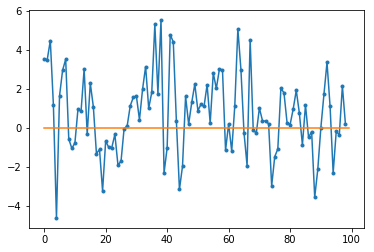

In [356]:
plt.plot(range(len(w)),w,'.-')
plt.plot([0,len(w)],[0,0])
plt.show()

In [312]:
w2,between,group1,group2=turning_point(0,len(w))

In [313]:
first_index,value=normalization(w2,between,group1,group2)

In [314]:
first_index

97

In [315]:
compare(6)

[0, 67, 68, 84, 86, 90, 94, 97, 99]

In [307]:
w[94:]

[-2.310414318043749,
 -0.1830080699205272,
 -0.3575015934246072,
 2.1486448128732767,
 0.17495451409943996]

In [1]:
data=[1,2,3,-2,-4,8,9]

### finding

#### IMDB

In [3]:
movie_type=pd.read_csv('./IMDB.csv')
movie_type=movie_type.dropna(axis=0,how='any',subset=['tconst','averageRating','positive1','negative1','overall'])

In [5]:
len(movie_type)

16255

In [6]:
globals = {
    'nan': 0   
}

In [7]:
movie_type['positive1']=movie_type['positive1'].apply(lambda x: eval(x, globals))
movie_type['negative1']=movie_type['negative1'].apply(lambda x: eval(x, globals))
movie_type['overall']=movie_type['overall'].apply(lambda x: eval(x, globals))

In [8]:
movie_type['intensity']=movie_type.apply(lambda row: np.array(row['positive1'])-np.array(row['negative1']),axis=1)
movie_type['bias']=movie_type.apply(lambda row: np.array(row['positive1'])+np.array(row['negative1']),axis=1)
# movie_type['pearson']=movie_type.apply(lambda row: stats.pearsonr(row['intensity'],row['bias'])[0],axis=1)
# movie_type['test']=movie_type.apply(lambda row: stats.pearsonr(row['intensity'],row['bias'])[1],axis=1)

In [242]:
# len(movie_type[movie_type['test']<0.1])

5721

In [243]:
# select=movie_type[movie_type['test']<0.1]

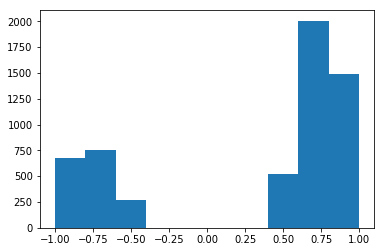

In [244]:
# plt.hist(select['pearson'])
# plt.show()

In [317]:
# def bimodal(x):
#     peaks=[]
#     for i in range(1, len(x)-1):
#         if (x[i-1] < x[i] > x[i+1])&(x[i]>np.mean(x)):
#             peaks.append([i, x[i]])
#     return (peaks,len(peaks))

In [318]:
# movie_type['peak']=movie_type['intensity'].apply(lambda x:bimodal(x))

In [332]:
# movie_type['burst']=movie_type['bias'].apply(lambda x:bimodal(x))

In [10]:
result=movie_type.sort_values(['averageRating'],ascending=False)

In [44]:
result.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,positive1,negative1,overall,intensity,bias,mean,intensity_mean,bias_mean
131713,tt0496595,movie,Xuxinha and Guto Against the Space Monsters,Xuxinha e Guto Contra os Monstros do Espaço,0,2005.0,\N,85,"Animation,Family,Sci-Fi",1,444,"[0, 2.6518806659732377, 4.79065131866497, 0, 9...","[0, -4.670332209908231, -2.73035273520199, 0, ...","[3.218519479063962, -0.6385040111727591, 1.062...","[0.0, 7.322212875881469, 7.52100405386696, 0.0...","[0.0, -2.0184515439349937, 2.0602985834629806,...",4.666087,3.661106,0.000000
195249,tt3587202,movie,Nosferatu vs. Father Pipecock & Sister Funk,Nosferatu vs. Father Pipecock & Sister Funk,0,2014.0,\N,134,"Adventure,Comedy,Fantasy",1,101,"[12.846002345517093, 3.509909954535395, 4.3094...","[-3.134823374210562, -7.324989264184424, -9.30...","[3.597273711911303, -0.9873754399149183, -2.33...","[15.980825719727655, 10.83489921871982, 13.609...","[9.71117897130653, -3.815079309649029, -4.9910...",10.466252,10.738755,0.761772
167585,tt1894441,movie,Dobby Dobson: An Interview with Jamaica's Musi...,Dobby Dobson: An Interview with Jamaica's Musi...,0,2009.0,\N,170,Documentary,1,68,"[7.219529568401275, 3.5009971752335076, 11.597...","[-3.9495429664966935, -3.6597707757205313, -5....","[1.4838909231171773, 0.34163684834271635, 3.01...","[11.169072534897968, 7.160767950954039, 17.532...","[3.2699866019045816, -0.1587736004870237, 5.66...",10.458186,10.860870,2.566765
112267,tt0341341,movie,Drop Me a Cat,Gei wo yi zhi mao,0,2003.0,\N,94,Adventure,1,430,"[0, 4.218742804237313, 4.065793055359499, 7.10...","[0, -5.361341059300372, -7.518696215198062, -3...","[3.995564680478568, 0.5954642248873951, -1.319...","[0.0, 9.580083863537684, 11.584489270557562, 1...","[0.0, -1.1425982550630591, -3.452903159838563,...",7.379851,8.894005,0.190743
963,tt0010319,movie,The Jungle Trail,The Jungle Trail,0,1919.0,\N,50,Adventure,1,7,"[8.095623484816466, 7.073848362574395, 6.11339...","[-3.8707885429514213, -4.495087496306837, -4.8...","[0.9288304898412737, 0.034218323884871324, 0.8...","[11.966412027767888, 11.568935858881233, 10.94...","[4.224834941865044, 2.578760866267558, 1.27968...",12.294885,12.181378,1.987702


In [50]:
result['intensity_mean']=result['intensity'].apply(lambda x: np.max(x)-np.min(x))

In [51]:
result['bias_mean']=result['bias'].apply(lambda x: np.max(x)-np.min(x))

In [52]:
result['numVotes']=result['numVotes'].apply(lambda x: round(x))

In [49]:
y=result['numVotes']
X=result[['intensity_mean']]
X=sm.add_constant(X)
est=sm.OLS(y,X)
est=est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numVotes   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     491.7
Date:                Tue, 23 Apr 2019   Prob (F-statistic):          2.40e-107
Time:                        11:29:34   Log-Likelihood:            -2.1087e+05
No. Observations:               16255   AIC:                         4.218e+05
Df Residuals:                   16253   BIC:                         4.218e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1434.0474   1667.768      0.860      0.390   -1834.961    4703.056
intensity_mean  3937.8655    177.592     22.174      0.000    3589.765    4285.966
==============================================================================
Omnibus:                    20236.860   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3436420.597
Skew:                           6.807   Prob(JB):                         0.00
Kurtosis:                      72.917   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

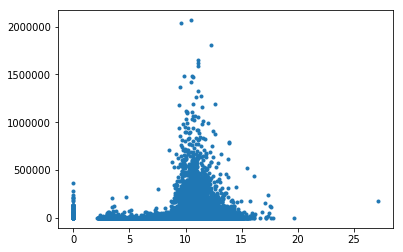

In [43]:
plt.plot(result['intensity_mean'],result['numVotes'],'.')
plt.show()

#### IMSDB

In [55]:
imsdb=pd.read_csv('./imsdb.csv',index_col=0)
imsdb['name']=imsdb['name'].apply(lambda x: x.replace('-',' '))
imsdb = imsdb.rename(columns={'name':'originalTitle'})
movie_type=pd.read_csv('./IMDB.csv')
movie_type=movie_type.dropna(axis=0,how='any',subset=['tconst','averageRating','positive1','negative1','overall'])
movie_type=movie_type.drop(['positive1','negative1','overall'], axis=1)
result=pd.merge(imsdb, movie_type, how='left', on=['originalTitle'])

In [56]:
result.head()

,originalTitle,ending,type,IMSDb_rating,User_rating,Release_date,Script_date,gender,ending_10,vec,wordvec,wordvec100,wordvec200,mode,ending_100,positive1,negative1,overall,tconst,titleType,primaryTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,12 Monkeys,0.0,"Drama,Sci-Fi,Thriller,nan,nan,nan,nan",NaN,9.25,NaN,1994.0,0.0,1.0,"[5.622385321100918, 5.911052631578946, 5.39978...","[11.307730492605003, 10.991469650366682, 10.99...","[8.23082187576179, 12.77271117249029, 12.77271...","[10.024954274955448, 8.23082187576179, 8.23082...",-1.0,0.0,"[7.8125770373176735, 8.353506669837504, 8.6618...","[-7.667559682758647, -7.305652797755018, -7.15...","[0.10874480474686815, 0.5781660625816791, 0.50...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12 Years a Slave,0.0,"Drama,nan,nan,nan,nan,nan,nan",NaN,NaN,2013.0,NaN,0.0,0.0,"[6.753749999999996, 5.697450980392157, 4.73106...","[13.499752241438784, 13.08735227105251, 13.087...","[14.956624680212244, 14.956624680212244, 14.95...","[14.956624680212244, 14.956624680212244, 14.95...",-2.0,1.0,"[12.153360440171282, 7.804430624831143, 7.5657...","[-7.205798368687327, -7.48272948198199, -7.499...","[1.472098207869861, 0.35410518784319117, 0.464...",tt2024544,movie,12 Years a Slave,0.0,2013.0,\N,134,"Biography,Drama,History",8.1,569712.0
2,127 Hours,0.0,"Adventure,Drama,Thriller,nan,nan,nan,nan",NaN,NaN,2010.0,NaN,0.0,0.0,"[6.827333333333333, 6.888750000000001, 5.81688...","[0.6101451800952304, 13.08735227105251, -0.659...","[8.088998279314495, 12.77271117249029, 12.7727...","[6.344458756247647, 8.088998279314495, 13.8692...",-1.0,0.0,"[8.394687861573447, 9.363391158032435, 8.02177...","[-6.319620062873694, -6.1732960817650175, -6.8...","[0.6146902419962077, 1.2466003433781834, 0.407...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1492 Conquest of Paradise,0.0,"Adventure,Drama,nan,nan,nan,nan,nan",NaN,5.00,NaN,1991.0,0.0,0.0,"[6.4945535714285745, 6.647472527472528, 6.9833...","[-1.831013221486387, 12.95863330645571, 12.958...","[14.956624680212244, 14.956624680212244, 14.95...","[14.956624680212244, 14.956624680212244, 14.95...",5.0,1.0,"[9.29265175007223, 10.32429039640734, 11.87730...","[-7.834262231088138, -7.449221810347994, -7.55...","[0.5409875379695621, 0.8415460588770699, 0.922...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15 Minutes,0.0,"Action,Crime,Thriller,nan,nan,nan,nan",NaN,5.75,NaN,NaN,0.0,1.0,"[6.141799999999998, 5.6757647058823535, 5.8467...","[12.95863330645571, 10.991469650366682, 10.991...","[14.956624680212244, 14.956624680212244, 15.79...","[14.956624680212244, 8.23082187576179, 14.9566...",-2.0,0.0,"[10.99559906691555, 9.194843402101649, 9.98300...","[-7.491677768966539, -7.184029578390307, -7.64...","[1.2090681210726923, 0.7343428712807148, 1.105...",tt0179626,movie,15 Minutes,0.0,2001.0,\N,120,"Action,Crime,Drama",6.1,46252.0


In [57]:
len(result)

1146

In [58]:
result1=result.dropna(axis=0,how='any',subset=['originalTitle','averageRating','numVotes','positive1','negative1','overall'])

In [59]:
len(result1)

578

In [141]:
result1=result.dropna(axis=0,how='any',subset=['originalTitle','User_rating','positive1','negative1','overall'])

In [142]:
len(result1)

786

In [143]:
globals = {
    'nan': 0   
}

In [144]:
result1['positive1']=result1['positive1'].apply(lambda x: eval(x, globals))
result1['negative1']=result1['negative1'].apply(lambda x: eval(x, globals))
result1['overall']=result1['overall'].apply(lambda x: eval(x, globals))

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [145]:
result1['intensity']=result1.apply(lambda row: np.array(row['positive1'])-np.array(row['negative1']),axis=1)
result1['bias']=result1.apply(lambda row: np.array(row['positive1'])+np.array(row['negative1']),axis=1)
result1['pearson']=result1.apply(lambda row: stats.pearsonr(row['intensity'],row['bias'])[0],axis=1)
result1['test']=result1.apply(lambda row: stats.pearsonr(row['intensity'],row['bias'])[1],axis=1)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [146]:
len(result1[result1['test']<0.1])

678

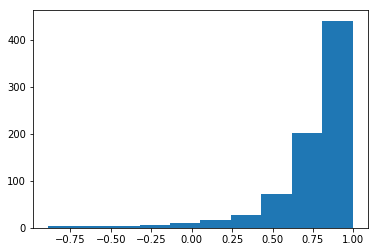

In [147]:
plt.hist(result1['pearson'])
plt.show()

In [148]:
_1=result1[result1['pearson']<0]

In [149]:
len(_1)

26

In [150]:
_2=result1[result1['pearson']>0]

In [151]:
len(_2)

760

In [153]:
_1['User_rating'].describe()

count    26.000000
mean      7.920385
std       1.932026
min       1.000000
25%       7.480000
50%       8.145000
75%       9.320000
max      10.000000
Name: User_rating, dtype: float64

In [154]:
_2['User_rating'].describe()

count    760.000000
mean       8.469461
std        1.620843
min        1.000000
25%        7.815000
50%        9.000000
75%        9.730000
max       10.000000
Name: User_rating, dtype: float64

#### gutenberg book

In [218]:
book=pd.read_csv('./metadata1.csv')

In [219]:
book=book.dropna(axis=0,how='any',subset=['positive1','negative1','overall'])

In [220]:
globals = {
    'nan': 0   
}

In [221]:
book['positive1']=book['positive1'].apply(lambda x: eval(x,globals))
book['negative1']=book['negative1'].apply(lambda x: eval(x,globals))

In [222]:
book=book[book['download_num']>=20]

In [223]:
len(book)

17284

In [224]:
book['intensity']=book.apply(lambda row: np.array(row['positive1'])-np.array(row['negative1']),axis=1)
book['bias']=book.apply(lambda row: np.array(row['positive1'])+np.array(row['negative1']),axis=1)
book['pearson']=book.apply(lambda row: stats.pearsonr(row['intensity'],row['bias'])[0],axis=1)
book['test']=book.apply(lambda row: stats.pearsonr(row['intensity'],row['bias'])[1],axis=1)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [225]:
len(book[book['test']<0.1])

11145

In [226]:
select=book[book['test']<0.1]

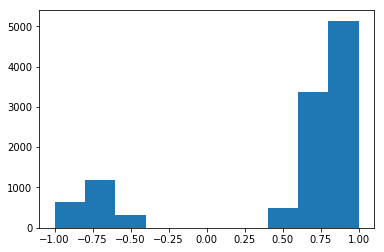

In [227]:
plt.hist(select['pearson'])
plt.show()

In [228]:
select1=book[book['pearson']<0]

In [229]:
select2=book[book['pearson']>0]

In [230]:
select1['download_num'].describe()

count     4770.000000
mean       127.120755
std        436.837048
min         20.000000
25%         29.000000
50%         44.000000
75%         89.000000
max      15492.000000
Name: download_num, dtype: float64

In [231]:
select2['download_num'].describe()

count    12441.000000
mean       134.008520
std        711.741923
min         20.000000
25%         28.000000
50%         42.000000
75%         80.000000
max      43374.000000
Name: download_num, dtype: float64

In [309]:
def bimodal(x):
    peaks=[]
    for i in range(1, len(x)-1):
        if (x[i-1] < x[i] > x[i+1])&(x[i]>np.mean(x)):
            peaks.append([i, x[i]])
    return (peaks,len(peaks))

In [310]:
book['peak']=book['intensity'].apply(lambda x:bimodal(x))

In [311]:
count=[i[1] for i in list(book['peak'].values)]

In [312]:
Counter(count)

Counter({0: 193, 1: 2619, 2: 8448, 3: 5453, 4: 571})

In [331]:
8448/len(count)

0.5197170101507228